# Задание для итоговой работы

**Анализ данных о покупках** 

* Шаг 1. Импорт библиотек 
* Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)
* Шаг 3. Очистка данных
    1. Проверить соответствие типов данных, выполнить преобразование типов данных при необходимости
    1. Проверить на пропуски, заполнить пропуски при необходимости 
    1. Проверить данные на наличие дубликатов в датасетах *customers* и *product*
    1. Выполнить поиск аномалий в данных, построить диаграмму размаха по признаку возраст покупателя, выполнить удаление выбросов при необходимости
* Шаг 4. Разведочный (исследовательский) анализ данных
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности
    1. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
    1. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
    1. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
    1. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
    1. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму
* Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
* Шаг 6. Кластеризация по покупателем
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*
    1. Найти оптимальное количество кластеров по покупателям
    1. Построить модель кластеризации данных
    1. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы
* Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*
    1. Выполнить коллаборативную фильтрацию по схожести покупателей
    1. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510
    

Исходные файлы для анализа:

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true



### Описание датасета
#### customers.csv

Признак | Описание
--:|:--
club_member | Статус члена клуба магазина
fashion_news | Часто ли смотрит новости о моде
age | Возраст
customer_id | Уникальный идентификатор покупателя


#### transactions.csv
Признак | Описание
--:|:--
t_dat | Дата
article_id | Уникальный идентификатор товара
price | Цена товара
customer_id | Уникальный идентификатор покупателя


#### product.csv
Признак | Описание
--:|:--
article_id | Уникальный идентификатор товара
product_name | Наименование товара
colour | Цвет товара

## <span style="color:green"> $\checkmark$ </span> Шаг 1. Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})

## <span style="color:green"> $\checkmark$ </span> Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv).

In [2]:
df_transactions = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true", index_col=0)
df_customers = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true', index_col=0) 
df_products = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true", index_col=0) 

## <span style="color:green"> $\checkmark$ </span> Размерность, просмотр начальных и конечных записей наборов.

In [3]:
df1 = df_transactions
df2 = df_customers
df3 = df_products
df1 # dataset transactions

,t_dat,article_id,price,customer_id
0,2020-04-13,706016003,33.88,0
1,2018-09-21,493810014,19.05,1
2,2018-10-04,594541012,16.93,2
3,2018-12-11,719712001,36.00,3
4,2019-04-08,700737007,25.41,4
...,...,...,...,...
317879,2019-01-20,589924010,10.15,229802
317880,2019-04-30,706268029,3.39,205253
317881,2019-07-03,554792001,25.41,100940
317882,2020-02-20,243937028,16.93,162847


In [4]:
df2 # dataset customers

,club_member,fashion_news,age,customer_id
0,ACTIVE,NONE,49.0,91991
1,ACTIVE,Regularly,32.0,164401
2,ACTIVE,Regularly,56.0,182738
3,ACTIVE,Regularly,30.0,166422
4,PRE-CREATE,Regularly,40.0,164557
...,...,...,...,...
229799,ACTIVE,Regularly,44.0,96272
229800,ACTIVE,NONE,27.0,14468
229801,ACTIVE,NONE,27.0,76150
229802,ACTIVE,NONE,40.0,94386


In [5]:
df3 # dataset products

,article_id,product_name,color
0,108775015,Vest top,Black
1,108775044,Vest top,White
2,110065001,Bra,Black
3,110065002,Bra,White
4,110065011,Bra,Light Beige
...,...,...,...
53621,947934001,Underwear Tights,Black
53622,949198001,Trousers,Black
53623,949551002,Sweater,Pink
53624,952267001,Underwear Tights,Black


## <span style="color:green"> $\checkmark$ </span> Описательные статистики.

### $\blacktriangleright$ Датасет transactions.

In [6]:
for t in set(df1.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df1.select_dtypes(include = [t]).describe(), '\n')

Переменные типа object
             t_dat
count       317884
unique         734
top     2019-09-28
freq          1995 

Переменные типа int64
         article_id    customer_id
count  3.178840e+05  317884.000000
mean   6.957393e+08  102987.763804
std    1.338297e+08   65772.091377
min    1.087750e+08       0.000000
25%    6.315360e+08   45332.000000
50%    7.139971e+08   97248.500000
75%    7.863680e+08  157616.250000
max    9.534500e+08  229803.000000 

Переменные типа float64
               price
count  317884.000000
mean       27.834441
std        19.230723
min         0.190000
25%        15.800000
50%        25.410000
75%        33.880000
max       500.000000 



### $\blacktriangleright$ Датасет customers.

In [7]:
for t in set(df2.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df2.select_dtypes(include = [t]).describe(), '\n')

Переменные типа object
       club_member fashion_news
count       229343       228565
unique           3            3
top         ACTIVE         NONE
freq        223275       133950 

Переменные типа int64
         customer_id
count  229804.000000
mean   114901.500000
std     66338.844968
min         0.000000
25%     57450.750000
50%    114901.500000
75%    172352.250000
max    229803.000000 

Переменные типа float64
                 age
count  228613.000000
mean       35.987402
std        13.195025
min        16.000000
25%        25.000000
50%        31.000000
75%        48.000000
max        98.000000 



### $\blacktriangleright$ Датасет products.

In [8]:
for t in set(df2.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df2.select_dtypes(include = [t]).describe(), '\n')

Переменные типа object
       club_member fashion_news
count       229343       228565
unique           3            3
top         ACTIVE         NONE
freq        223275       133950 

Переменные типа int64
         customer_id
count  229804.000000
mean   114901.500000
std     66338.844968
min         0.000000
25%     57450.750000
50%    114901.500000
75%    172352.250000
max    229803.000000 

Переменные типа float64
                 age
count  228613.000000
mean       35.987402
std        13.195025
min        16.000000
25%        25.000000
50%        31.000000
75%        48.000000
max        98.000000 



## <span style="color:green"> $\checkmark$ </span> Проверка на уникальность.

### $\blacktriangleright$ Датасет transactions.

In [9]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df1.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df1[i].unique()))+'\033[0m')
    print(df1[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак t_dat имеет 734 следующих уникальных значений:
['2020-04-13' '2018-09-21' '2018-10-04' '2018-12-11' '2019-04-08'
 '2019-03-31' '2019-01-28' '2019-10-06' '2020-07-04' '2020-03-31'
 '2018-10-23' '2019-02-26' '2020-09-03' '2018-10-29' '2020-07-11'
 '2020-09-17' '2019-06-19' '2019-07-09' '2019-07-01' '2019-02-27'
 '2018-10-07' '2019-01-06' '2020-03-02' '2020-01-02' '2020-08-23'
 '2018-11-13' '2020-05-19' '2020-07-17' '2019-08-30' '2018-10-12'
 '2019-09-30' '2019-05-27' '2019-02-23' '2020-09-12' '2020-01-23'
 '2019-02-17' '2019-05-31' '2020-04-11' '2019-02-01' '2018-12-21'
 '2019-05-25' '2019-04-15' '2019-06-09' '2019-06-29' '2019-05-11'
 '2020-05-20' '2020-09-20' '2019-08-18' '2019-05-22' '2020-05-21'
 '2019-03-26' '2020-04-09' '2019-05-23' '2019-07-25' '2020-05-18'
 '2019-02-22' '2019-07-31' '2020-07-24' '2019-05-30' '2020-03-08'
 '2019-06-01' '2019-07-27' '2019-04-16' '2020-07-28' '2020-09-07'
 '2019-04-04' '2019-05-17' '2019-09-06' '2019-05-05' '2019-11-28'


### $\blacktriangleright$ Датасет customers.

In [10]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df2.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df2[i].unique()))+'\033[0m')
    print(df2[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак club_member имеет 4 следующих уникальных значений:
['ACTIVE' 'PRE-CREATE' 'LEFT CLUB' nan]
---------------------------------------------------------------------------------
Признак fashion_news имеет 4 следующих уникальных значений:
['NONE' 'Regularly' nan 'Monthly']
---------------------------------------------------------------------------------
Признак age имеет 80 следующих уникальных значений:
[49. 32. 56. 30. 40. 44. 26. 24. 52. 48. 19. 51. 25. 20. 43. 41. 60. 45.
 28. 27. 71. 22. 36. 23. 34. 39. 50. 33. 29. 55. 42. 47. 53. 54. 46. 59.
 21. 61. 58. 62. 35. 68. 64. 63. 38. 57. 31. 65. 37. 66. 18. 72. 76. 70.
 75. nan 73. 67. 69. 74. 17. 78. 82. 79. 77. 85. 84. 88. 83. 80. 93. 81.
 16. 91. 89. 90. 98. 95. 87. 96.]
---------------------------------------------------------------------------------
Признак customer_id имеет 229804 следующих уникальных значений:
[ 91991 164401 182738 ...  76150  94386 210647]
-------------------------------------------------

### $\blacktriangleright$ Датасет products.

In [11]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df3.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df3[i].unique()))+'\033[0m')
    print(df3[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак article_id имеет 53626 следующих уникальных значений:
[108775015 108775044 110065001 ... 949551002 952267001 953450001]
---------------------------------------------------------------------------------
Признак product_name имеет 118 следующих уникальных значений:
['Vest top' 'Bra' 'Underwear Tights' 'Leggings/Tights' 'Trousers'
 'Hair clip' 'Umbrella' 'Sweater' 'Bodysuit' 'Hair string' 'Socks'
 'Unknown' 'Top' 'Pyjama jumpsuit/playsuit' 'Hoodie' 'Hair/alice band'
 'Belt' 'Bikini top' 'Underwear bottom' 'Swimsuit' 'Skirt' 'Hat/beanie'
 'Kids Underwear top' 'Shorts' 'T-shirt' 'Cap/peaked' 'Pyjama set'
 'Sneakers' 'Dress' 'Sunglasses' 'Cardigan' 'Gloves' 'Earring' 'Blazer'
 'Swimwear bottom' 'Jacket' 'Shirt' 'Costumes' 'Robe' 'Scarf' 'Coat'
 'Other accessories' 'Polo shirt' 'Slippers' 'Night gown' 'Alice band'
 'Straw hat' 'Tailored Waistcoat' 'Ballerinas' 'Tie' 'Necklace'
 'Pyjama bottom' 'Felt hat' 'Bag' 'Bracelet' 'Boots' 'Blouse' 'Watch'
 'Beanie' 'Hat/bri

## <span style="color:green"> $\checkmark$ </span> Шаг 3. Очистка данных.

### 1. Проверка соответствия типов данных.

#### $\blacktriangleright$ Общая информация по наборам данных. 

In [12]:
df1.info() # dataset transactions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317884 entries, 0 to 317883
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   t_dat        317884 non-null  object 
 1   article_id   317884 non-null  int64  
 2   price        317884 non-null  float64
 3   customer_id  317884 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.1+ MB


In [13]:
df2.info() # dataset customers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229804 entries, 0 to 229803
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   club_member   229343 non-null  object 
 1   fashion_news  228565 non-null  object 
 2   age           228613 non-null  float64
 3   customer_id   229804 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ MB


In [14]:
df3.info() # dataset products

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53626 entries, 0 to 53625
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    53626 non-null  int64 
 1   product_name  53626 non-null  object
 2   color         53626 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


#### $\blacktriangleright$ Преобразуем тип признака "t_dat" датасета transactions.

In [15]:
# преобразование типов данных
df1["t_dat"] = pd.to_datetime(df1["t_dat"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317884 entries, 0 to 317883
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   t_dat        317884 non-null  datetime64[ns]
 1   article_id   317884 non-null  int64         
 2   price        317884 non-null  float64       
 3   customer_id  317884 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 12.1 MB


### 2. Проверка на пропуски.

#### $\blacktriangleright$ Шаблон для представления информации о пропусках.

#### $\blacktriangleright$ Датасет transactions.

In [16]:
df_null1 = pd.concat([df1.isna().sum().to_frame(name='count_missig_value'), 
           df1.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null1['pct_missig_value'] = np.round(df_null1['pct_missig_value']*100, 2)
df_null1

,count_missig_value,pct_missig_value
t_dat,0,0.0
article_id,0,0.0
price,0,0.0
customer_id,0,0.0


#### $\blacktriangleright$ Датасет customers.

In [17]:
df_null2 = pd.concat([df2.isna().sum().to_frame(name='count_missig_value'), 
           df2.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null2['pct_missig_value'] = np.round(df_null2['pct_missig_value']*100, 2)
df_null2

,count_missig_value,pct_missig_value
club_member,461,0.20
fashion_news,1239,0.54
age,1191,0.52
customer_id,0,0.00


#### $\blacktriangleright$ Датасет products.

In [18]:
df_null3 = pd.concat([df3.isna().sum().to_frame(name='count_missig_value'), 
           df3.isna().mean().to_frame(name='pct_missig_value')], axis=1)
df_null3['pct_missig_value'] = np.round(df_null3['pct_missig_value']*100, 2)
df_null3

,count_missig_value,pct_missig_value
article_id,0,0.0
product_name,0,0.0
color,0,0.0


$\blacktriangleright$ Есть необходимость поработать с датасетом customers.

#### <span style="color:green"> $\checkmark$ </span> Проверка на отсутствующие (NaN) значения

In [19]:
df2.isnull().sum()

club_member      461
fashion_news    1239
age             1191
customer_id        0
dtype: int64

#### <span style="color:green"> $\checkmark$ </span> Замена отсутствующих (NaN) значений на наиболее часто встречающиеся.

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df2["club_member"] = imputer.fit_transform(df2["club_member"].values.reshape(-1,1))[:,0]
df2["fashion_news"] = imputer.fit_transform(df2["fashion_news"].values.reshape(-1,1))[:,0]
df2["age"] = imputer.fit_transform(df2["age"].values.reshape(-1,1))[:,0]


In [21]:
df2.isnull().sum()

club_member     0
fashion_news    0
age             0
customer_id     0
dtype: int64

### $\blacktriangleright$ 3. Проверка данных на наличие дубликатов в датасетах customers и product.

In [22]:
df2.shape # dataset customers

(229804, 4)

In [23]:
df2.duplicated().sum()

0

In [24]:
df3.shape # dataset products

(53626, 3)

In [25]:
df3.duplicated().sum()

0

In [26]:
df2 = df2.drop_duplicates()
df2.shape # dataset customers

(229804, 4)

In [27]:
df3 = df3.drop_duplicates()
df3.shape # dataset products

(53626, 3)

### $\blacktriangleright$ 4. Поиск аномалий в данных, построение диаграммы размаха по признаку возраст покупателя, выполнение удаления выбросов при необходимости.

### $\blacktriangleright$ Датасет transactions.

In [28]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df1.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df1[i].unique()))+'\033[0m')
    print(df1[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак t_dat имеет 734 следующих уникальных значений:
['2020-04-13T00:00:00.000000000' '2018-09-21T00:00:00.000000000'
 '2018-10-04T00:00:00.000000000' '2018-12-11T00:00:00.000000000'
 '2019-04-08T00:00:00.000000000' '2019-03-31T00:00:00.000000000'
 '2019-01-28T00:00:00.000000000' '2019-10-06T00:00:00.000000000'
 '2020-07-04T00:00:00.000000000' '2020-03-31T00:00:00.000000000'
 '2018-10-23T00:00:00.000000000' '2019-02-26T00:00:00.000000000'
 '2020-09-03T00:00:00.000000000' '2018-10-29T00:00:00.000000000'
 '2020-07-11T00:00:00.000000000' '2020-09-17T00:00:00.000000000'
 '2019-06-19T00:00:00.000000000' '2019-07-09T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-02-27T00:00:00.000000000'
 '2018-10-07T00:00:00.000000000' '2019-01-06T00:00:00.000000000'
 '2020-03-02T00:00:00.000000000' '2020-01-02T00:00:00.000000000'
 '2020-08-23T00:00:00.000000000' '2018-11-13T00:00:00.000000000'
 '2020-05-19T00:00:00.000000000' '2020-07-17T00:00:00.000000000'
 '2019-08-30T0

### $\blacktriangleright$ Датасет customers.

In [29]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df2.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df2[i].unique()))+'\033[0m')
    print(df2[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак club_member имеет 3 следующих уникальных значений:
['ACTIVE' 'PRE-CREATE' 'LEFT CLUB']
---------------------------------------------------------------------------------
Признак fashion_news имеет 3 следующих уникальных значений:
['NONE' 'Regularly' 'Monthly']
---------------------------------------------------------------------------------
Признак age имеет 79 следующих уникальных значений:
[49. 32. 56. 30. 40. 44. 26. 24. 52. 48. 19. 51. 25. 20. 43. 41. 60. 45.
 28. 27. 71. 22. 36. 23. 34. 39. 50. 33. 29. 55. 42. 47. 53. 54. 46. 59.
 21. 61. 58. 62. 35. 68. 64. 63. 38. 57. 31. 65. 37. 66. 18. 72. 76. 70.
 75. 73. 67. 69. 74. 17. 78. 82. 79. 77. 85. 84. 88. 83. 80. 93. 81. 16.
 91. 89. 90. 98. 95. 87. 96.]
---------------------------------------------------------------------------------
Признак customer_id имеет 229804 следующих уникальных значений:
[ 91991 164401 182738 ...  76150  94386 210647]
-------------------------------------------------------------

### $\blacktriangleright$ Датасет products.

In [30]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df3.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df3[i].unique()))+'\033[0m')
    print(df3[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак article_id имеет 53626 следующих уникальных значений:
[108775015 108775044 110065001 ... 949551002 952267001 953450001]
---------------------------------------------------------------------------------
Признак product_name имеет 118 следующих уникальных значений:
['Vest top' 'Bra' 'Underwear Tights' 'Leggings/Tights' 'Trousers'
 'Hair clip' 'Umbrella' 'Sweater' 'Bodysuit' 'Hair string' 'Socks'
 'Unknown' 'Top' 'Pyjama jumpsuit/playsuit' 'Hoodie' 'Hair/alice band'
 'Belt' 'Bikini top' 'Underwear bottom' 'Swimsuit' 'Skirt' 'Hat/beanie'
 'Kids Underwear top' 'Shorts' 'T-shirt' 'Cap/peaked' 'Pyjama set'
 'Sneakers' 'Dress' 'Sunglasses' 'Cardigan' 'Gloves' 'Earring' 'Blazer'
 'Swimwear bottom' 'Jacket' 'Shirt' 'Costumes' 'Robe' 'Scarf' 'Coat'
 'Other accessories' 'Polo shirt' 'Slippers' 'Night gown' 'Alice band'
 'Straw hat' 'Tailored Waistcoat' 'Ballerinas' 'Tie' 'Necklace'
 'Pyjama bottom' 'Felt hat' 'Bag' 'Bracelet' 'Boots' 'Blouse' 'Watch'
 'Beanie' 'Hat/bri

#### $\blacktriangleright$ Построим диаграммы размаха по признаку возраст покупателя в зависимости от членства в клубе магазина. 

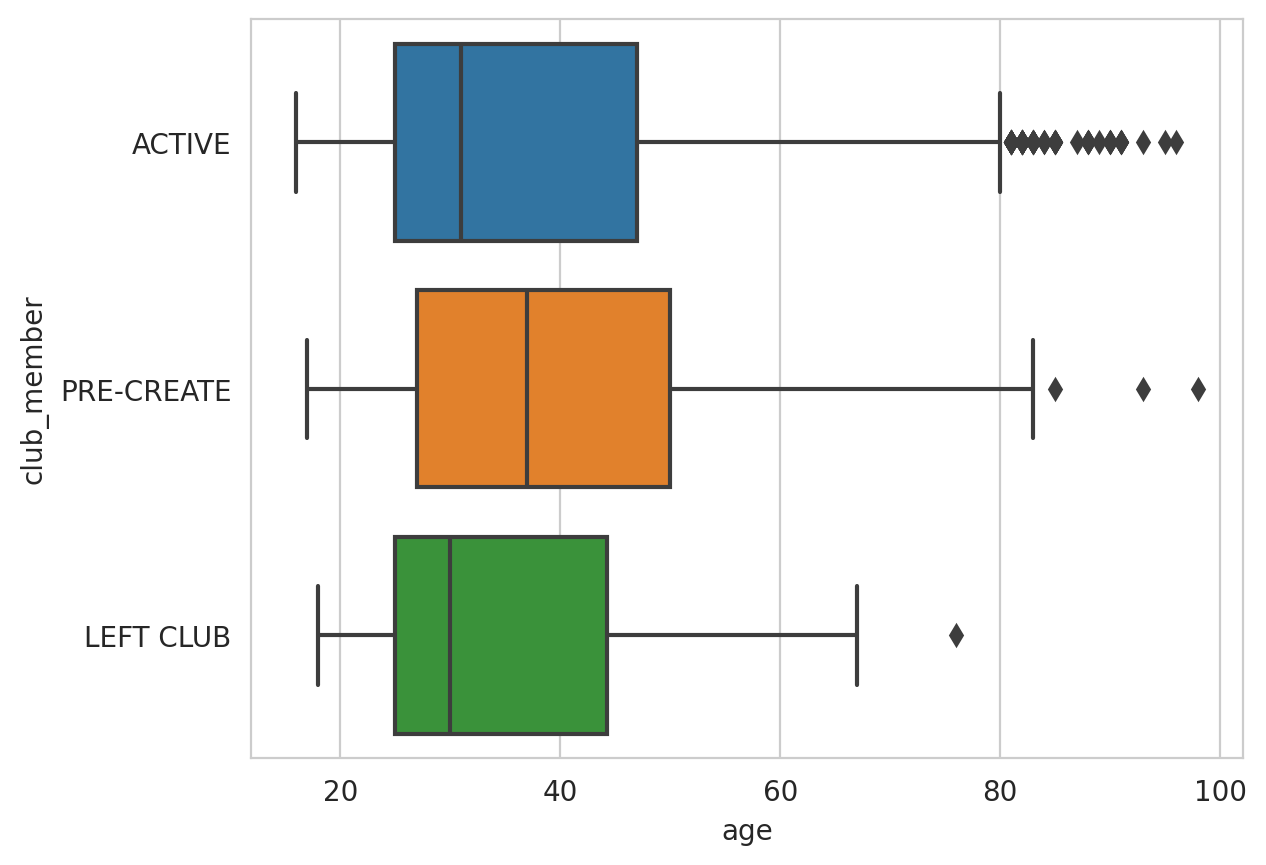

In [31]:
sns.boxplot(x = 'age', y ='club_member', data = df2);

#### $\blacktriangleright$ Поскольку каких-либо совсем экстремальных значений не наблюдается, выбросы не удаляем.

## <span style="color:green"> $\checkmark$ </span> Шаг 4. Разведочный (исследовательский) анализ данных.

### <span style="color:green"> $\checkmark$ </span> Измерение центральной тенденции.

#### $\blacktriangleright$ Датасет transactions.

In [32]:
df1.mean(numeric_only=True)

article_id     6.957393e+08
price          2.783444e+01
customer_id    1.029878e+05
dtype: float64

In [33]:
df1.median(numeric_only=True)

article_id     7.139971e+08
price          2.541000e+01
customer_id    9.724850e+04
dtype: float64

#### $\blacktriangleright$ Датасет customers.

In [34]:
df2.mean(numeric_only=True)

age                35.930458
customer_id    114901.500000
dtype: float64

In [35]:
df2.median(numeric_only=True)

age                31.0
customer_id    114901.5
dtype: float64

### <span style="color:green"> $\checkmark$ </span> Измерение дисперсии и диапазона.

#### $\blacktriangleright$ Датасет transactions.

In [36]:
df1.std()

t_dat          211 days 08:03:12.232096516
article_id                133829716.320274
price                            19.230723
customer_id                   65772.091377
dtype: object

In [37]:
df1.max(numeric_only=True) - df1.min(numeric_only=True)

article_id     8.446750e+08
price          4.998100e+02
customer_id    2.298030e+05
dtype: float64

#### $\blacktriangleright$ Датасет customers.

In [38]:
df2.std()

age               13.184413
customer_id    66338.844968
dtype: float64

In [39]:
df2.max(numeric_only=True) - df2.min(numeric_only=True)

age                82.0
customer_id    229803.0
dtype: float64

### <span style="color:green"> $\checkmark$ </span>  Процентили.

#### $\blacktriangleright$ Датасет transactions.

In [40]:
df1.quantile([0,.25,.50,.75,1])

,article_id,price,customer_id
0.00,108775015.0,0.19,0.00
0.25,631536016.0,15.80,45332.00
0.50,713997059.0,25.41,97248.50
0.75,786368001.0,33.88,157616.25
1.00,953450001.0,500.00,229803.00


#### $\blacktriangleright$ Датасет customers.

In [41]:
df2.quantile([0,.25,.50,.75,1])

,age,customer_id
0.00,16.0,0.00
0.25,25.0,57450.75
0.50,31.0,114901.50
0.75,48.0,172352.25
1.00,98.0,229803.00


### 1. Определим сколько товаров продавалось в разные месяцы, построим график плотности.

#### $\blacktriangleright$ График количества товаров по месяцам.

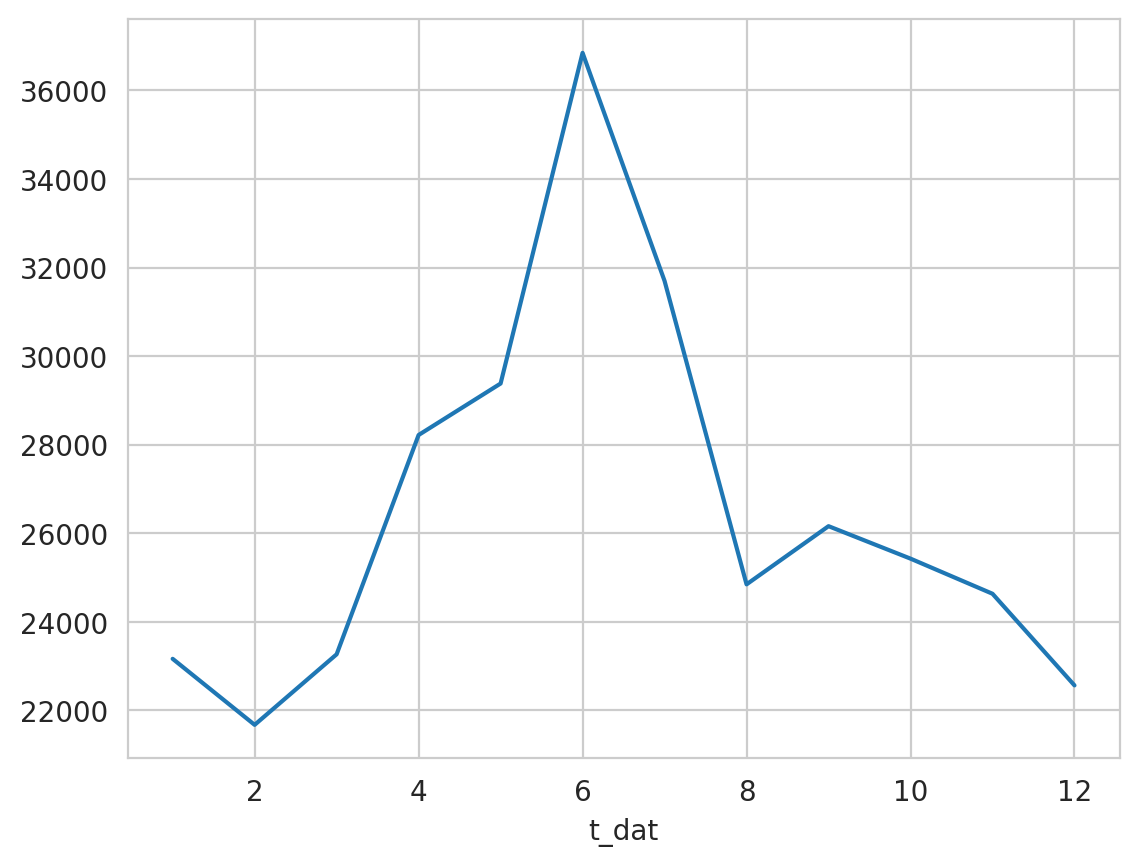

In [42]:
df1.groupby(df1.t_dat.dt.month)['article_id'].count().plot();

#### $\blacktriangleright$ Определим сколько товаров продавалось в разные месяцы.

In [43]:
df4 = df1.groupby(by= df1.t_dat.dt.month)['article_id'].count() \
                  .reset_index().rename(columns={'t_dat':"Месяц", 'article_id': "Количество"})                  
df4

,Месяц,Количество
0,1,23165
1,2,21674
2,3,23267
3,4,28219
4,5,29381
5,6,36848
6,7,31698
7,8,24846
8,9,26160
9,10,25427


#### $\blacktriangleright$ Столбчатая диаграмма количества товаров по месяцам.

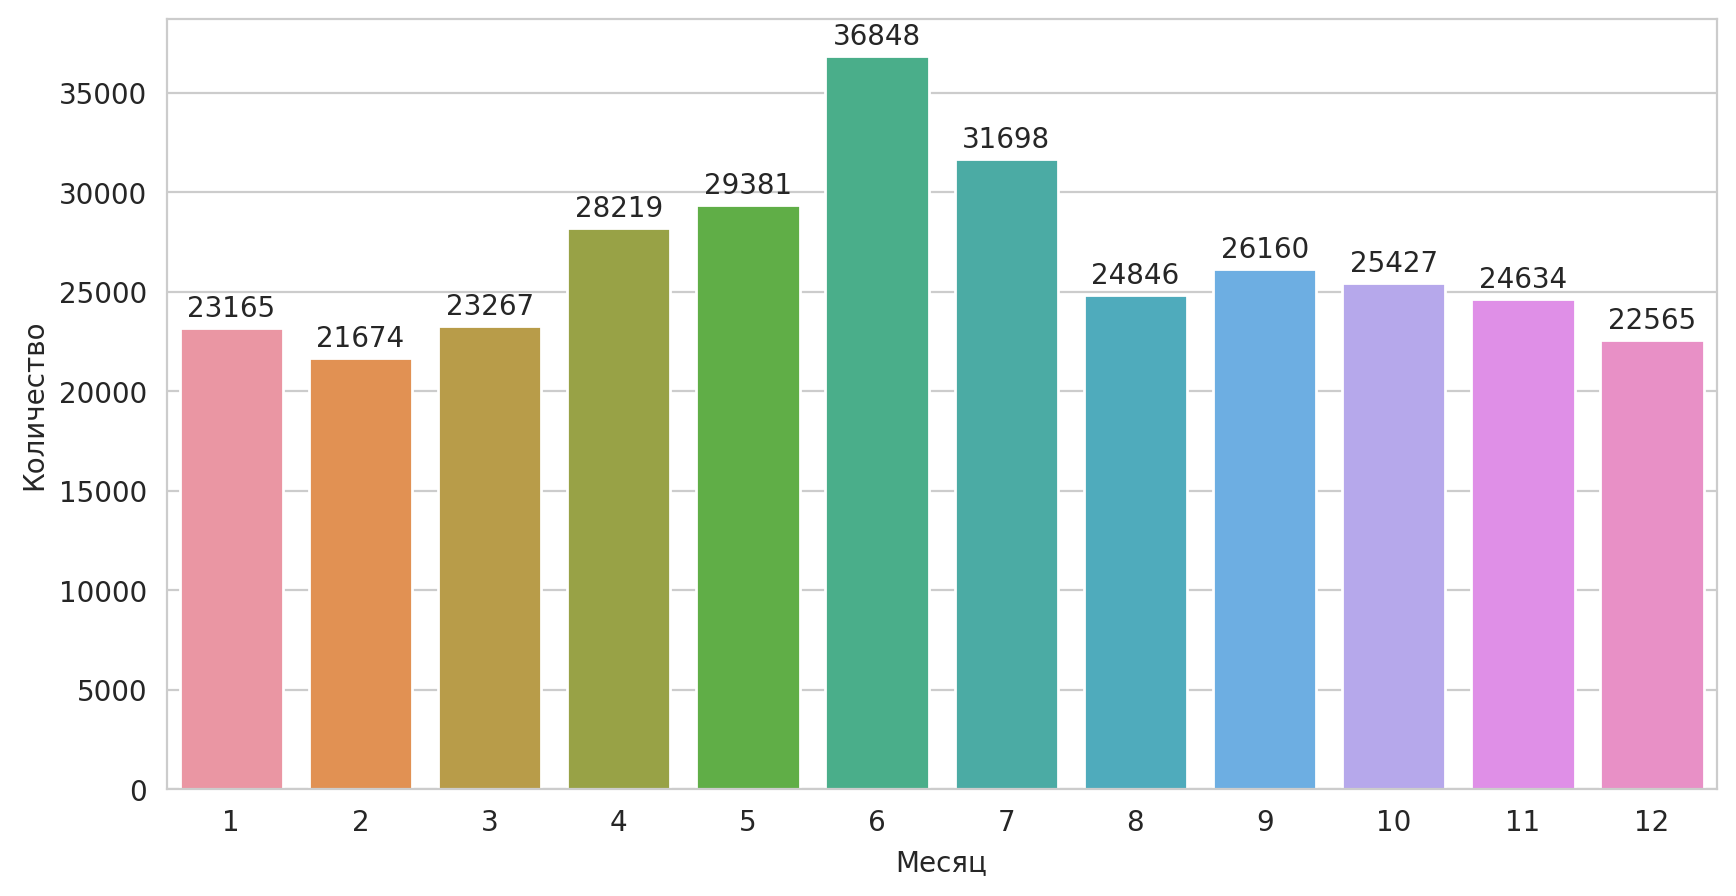

In [44]:
plt.figure(figsize=(10, 5))
graph = sns.barplot(data=df4, x="Месяц", y="Количество");
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10)    

#### $\blacktriangleright$ График плотности.

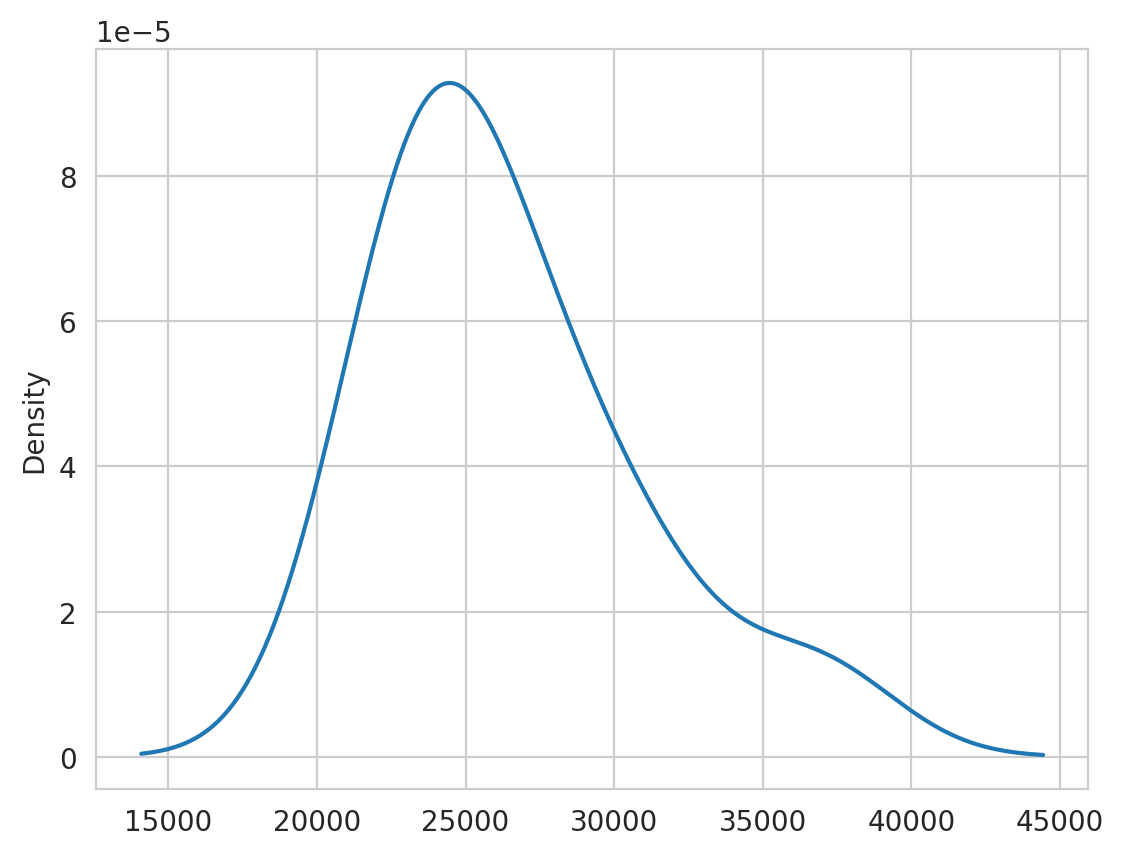

In [45]:
df4['Количество'].plot(kind='density');

#### $\blacktriangleright$ Столбчатая диаграмма частот.

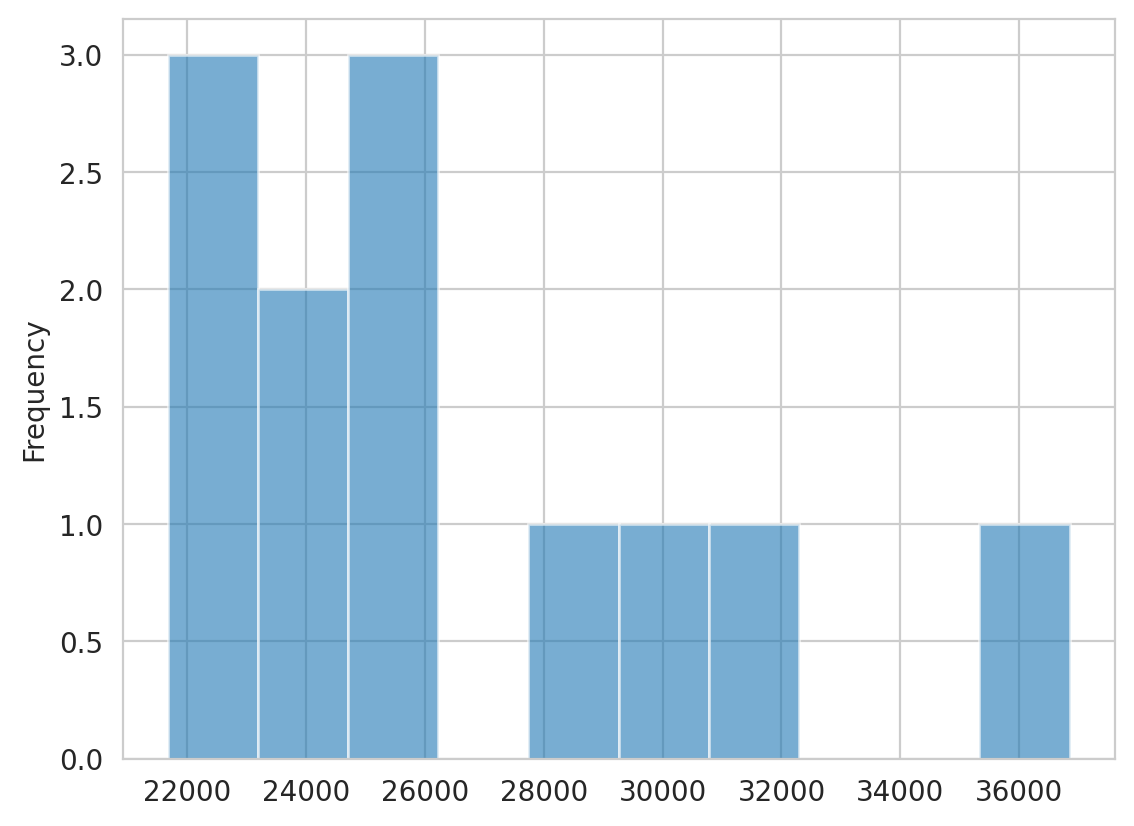

In [46]:
s = df4['Количество']
s.plot.hist(alpha=0.6);

#### 📍 Вывод: Пик продаж приходится на летние месяцы июнь и июль.

### 2. Определим список товаров ТОП-10 с максимальной выручкой за все время, построим столбчатые диаграммы.

In [72]:
df_prices = df1[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False) \
            .rename(columns={"price":"Выручка"}) \
            .reset_index()
df_prices = df_prices.merge(df3, how='left', left_on='article_id', right_on='article_id') \
            .sort_values(['Выручка'],ascending=False) \
            .rename(columns={'article_id': "Артикул",'product_name': "Товар", 'color': "Цвет"})
df5 = df_prices[:10]
df5['Полное наименование товара'] = df5['Товар'] + ' ' + df5['Цвет']
df5

,Артикул,Выручка,Товар,Цвет,Полное наименование товара
0,706016001,16364.05,Trousers,Black,Trousers Black
1,706016002,11309.68,Trousers,Light Blue,Trousers Light Blue
2,568601006,9659.58,Blazer,Black,Blazer Black
3,448509014,7720.95,Trousers,Blue,Trousers Blue
4,706016003,7001.72,Trousers,Dark Blue,Trousers Dark Blue
5,562245046,6886.59,Trousers,Black,Trousers Black
6,661794001,6848.58,Coat,Light Beige,Coat Light Beige
7,399223001,6772.23,Trousers,Black,Trousers Black
8,720125001,6312.63,Leggings/Tights,Black,Leggings/Tights Black
9,562245001,5761.51,Trousers,Black,Trousers Black


In [73]:
for i in range(0, 10):
    df5['Полное наименование товара'][i] = df5['Товар'][i] + ' ' + df5['Цвет'][i]+ ' '\
    + 'art.' + str(df5['Артикул'][i])

df5

,Артикул,Выручка,Товар,Цвет,Полное наименование товара
0,706016001,16364.05,Trousers,Black,Trousers Black art.706016001
1,706016002,11309.68,Trousers,Light Blue,Trousers Light Blue art.706016002
2,568601006,9659.58,Blazer,Black,Blazer Black art.568601006
3,448509014,7720.95,Trousers,Blue,Trousers Blue art.448509014
4,706016003,7001.72,Trousers,Dark Blue,Trousers Dark Blue art.706016003
5,562245046,6886.59,Trousers,Black,Trousers Black art.562245046
6,661794001,6848.58,Coat,Light Beige,Coat Light Beige art.661794001
7,399223001,6772.23,Trousers,Black,Trousers Black art.399223001
8,720125001,6312.63,Leggings/Tights,Black,Leggings/Tights Black art.720125001
9,562245001,5761.51,Trousers,Black,Trousers Black art.562245001


#### $\blacktriangleright$ Диаграмма ТОП 10 (по выручке) товаров по артикулу товара.

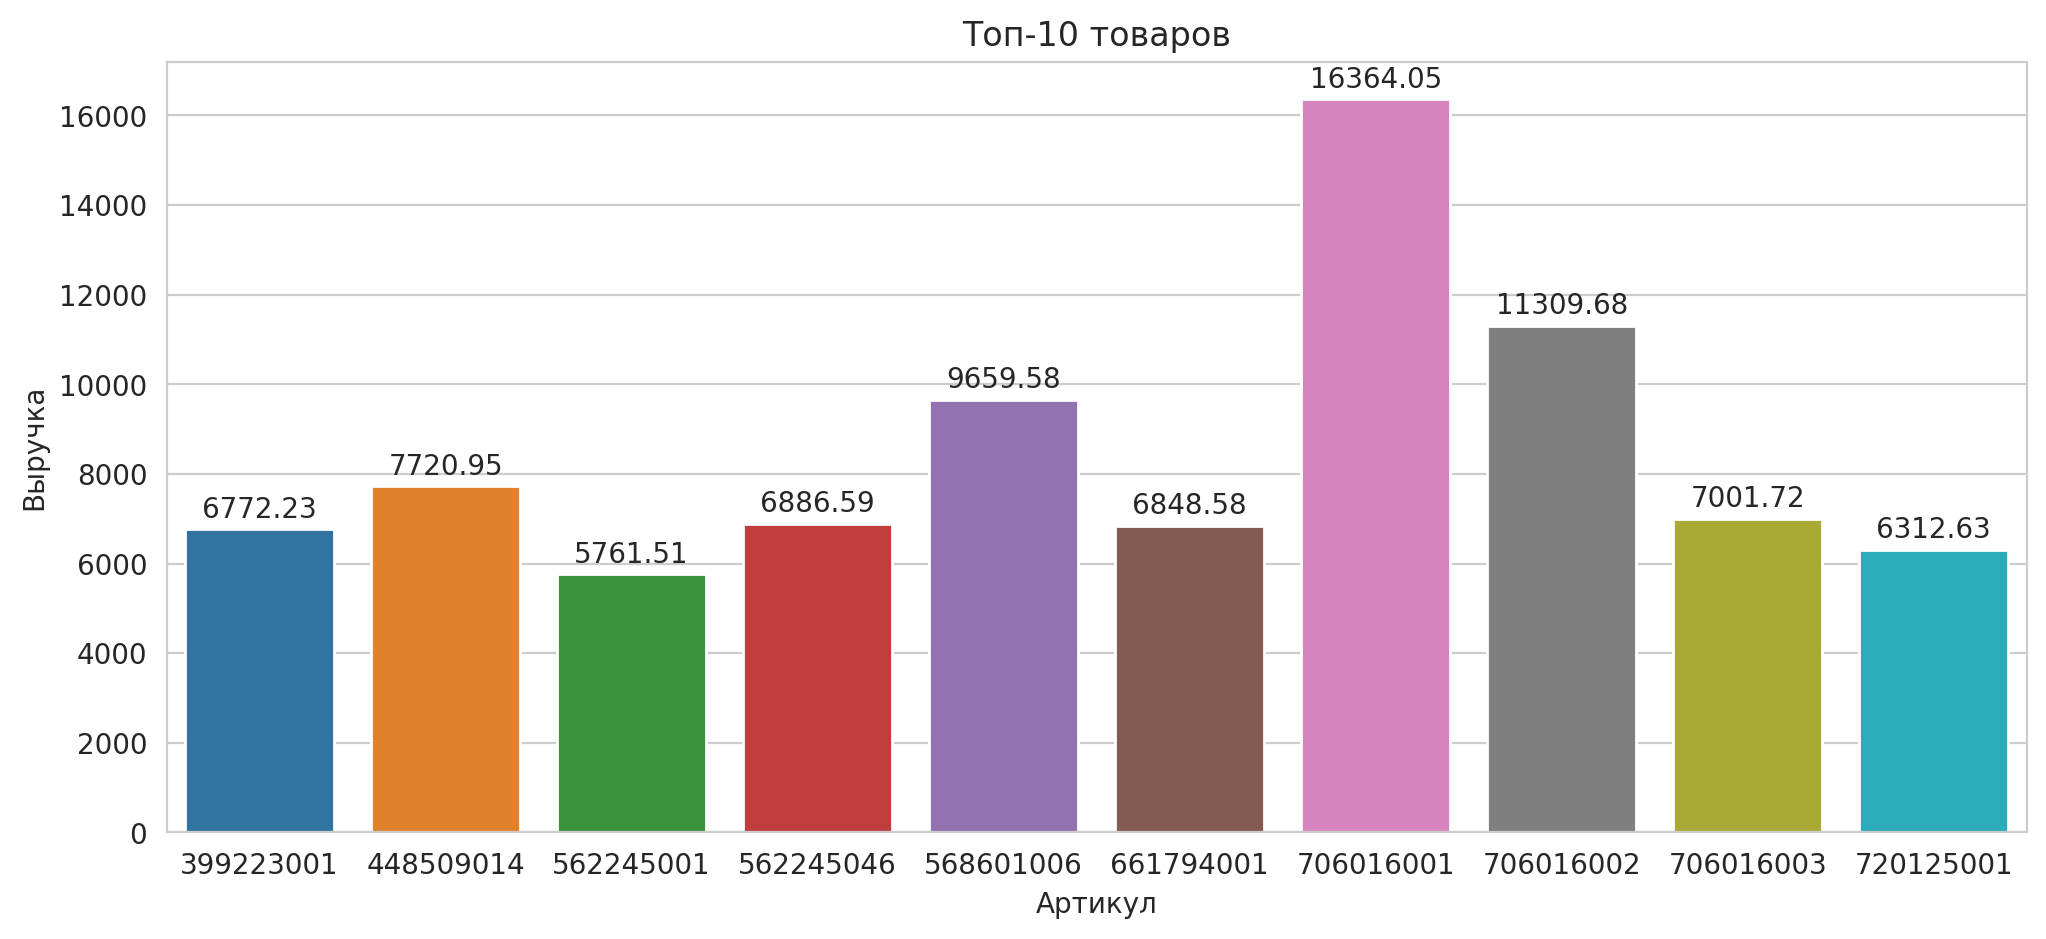

In [74]:
plt.figure(figsize=(12, 5))
plt.title('Топ-10 товаров')
graph = sns.barplot(data=df5, x="Артикул", y="Выручка");
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.2f', fontsize = 10)

#### $\blacktriangleright$ Диаграмма ТОП 10 (по выручке) товаров по наименованию товара.

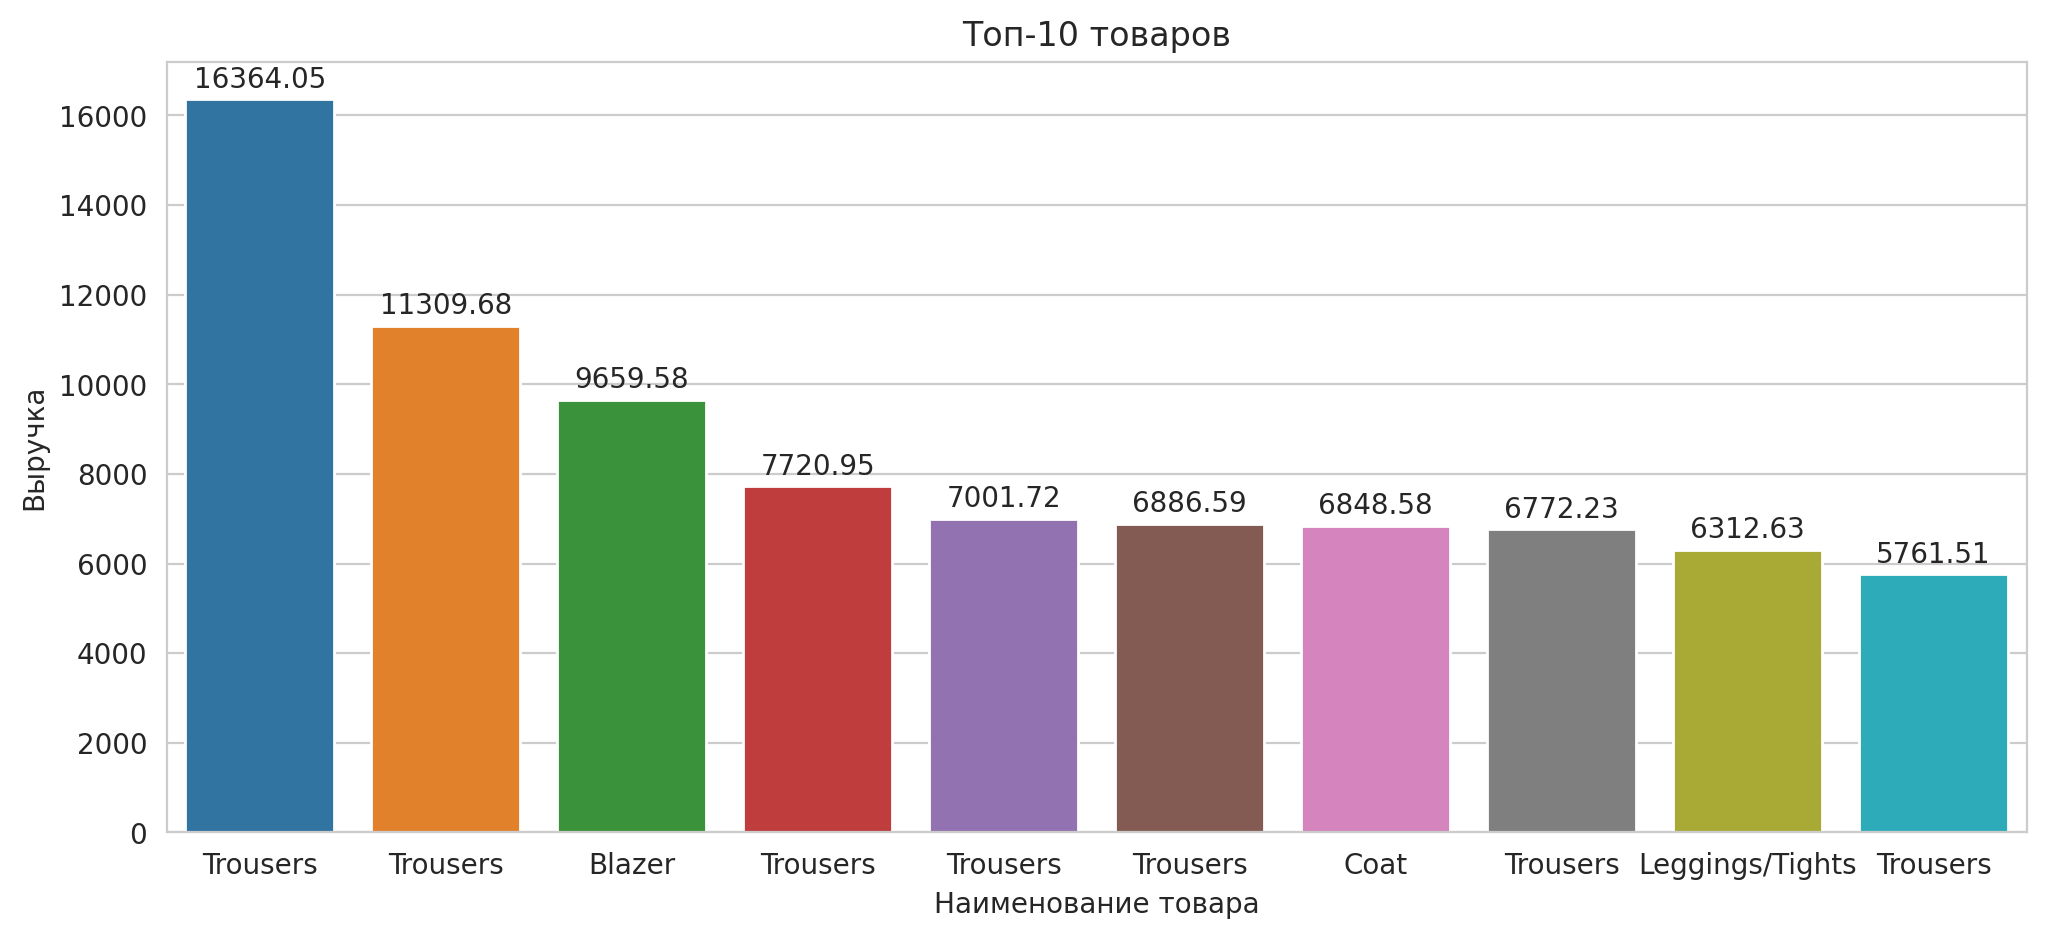

In [75]:
plt.figure(figsize=(12, 5))
plt.xlabel('Наименование товара')
plt.ylabel('Выручка')
plt.title('Топ-10 товаров')
graph = sns.barplot(data=df5, x=df5.index, y="Выручка")
plt.xticks(ticks = df5.index, labels = df5['Товар'].values)
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.2f', fontsize = 10);

#### $\blacktriangleright$ Диаграмма товаров, за которые получена наибольшая выручка без учета артикула.

In [76]:
fig = px.bar(df5, x= 'Товар', y='Выручка', color='Цвет', text_auto=True)
fig.show();

#### $\blacktriangleright$ Диаграмма ТОП 10 (по выручке) товаров по полному наименованию товара.

In [77]:
fig = px.bar(df5, x= 'Полное наименование товара', y='Выручка', color='Полное наименование товара', text_auto=True)
fig.show();

#### 📍 Вывод: Наибольшую выручку принесла продажа черных брюк разных моделей.

### 3. Определим список популярных товаров ТОП-10 за все время, построим столбчатые диаграммы.

In [78]:
df_count = df1[['t_dat',"article_id"]].groupby("article_id").count().sort_values(by='t_dat', ascending=False) \
            .rename(columns={'t_dat':"Количество"}) \
            .reset_index()
df_count = df_count.merge(df3, how='left', left_on='article_id', right_on='article_id') \
            .sort_values(['Количество'], ascending=False) \
            .rename(columns={'article_id': "Артикул",'product_name': "Товар", 'color': "Цвет"})
df6 = df_count[:10]
df6['Полное наименование товара'] = df6['Товар'] + ' ' + df6['Цвет']
df6

,Артикул,Количество,Товар,Цвет,Полное наименование товара
0,706016001,506,Trousers,Black,Trousers Black
1,706016002,348,Trousers,Light Blue,Trousers Light Blue
2,372860001,295,Socks,Black,Socks Black
4,610776002,275,T-shirt,Black,T-shirt Black
3,759871002,275,Vest top,Black,Vest top Black
5,464297007,273,Underwear bottom,Black,Underwear bottom Black
6,372860002,255,Socks,White,Socks White
7,156231001,244,Underwear Tights,Black,Underwear Tights Black
8,399256001,221,Trousers,Black,Trousers Black
9,399223001,220,Trousers,Black,Trousers Black


In [79]:
for i in range(0, 10):
    df6['Полное наименование товара'][i] = df6['Товар'][i] + ' ' + df6['Цвет'][i]+ ' '\
    + 'art.' + str(df6['Артикул'][i])

df6

,Артикул,Количество,Товар,Цвет,Полное наименование товара
0,706016001,506,Trousers,Black,Trousers Black art.706016001
1,706016002,348,Trousers,Light Blue,Trousers Light Blue art.706016002
2,372860001,295,Socks,Black,Socks Black art.372860001
4,610776002,275,T-shirt,Black,T-shirt Black art.610776002
3,759871002,275,Vest top,Black,Vest top Black art.759871002
5,464297007,273,Underwear bottom,Black,Underwear bottom Black art.464297007
6,372860002,255,Socks,White,Socks White art.372860002
7,156231001,244,Underwear Tights,Black,Underwear Tights Black art.156231001
8,399256001,221,Trousers,Black,Trousers Black art.399256001
9,399223001,220,Trousers,Black,Trousers Black art.399223001


#### $\blacktriangleright$ Диаграмма ТОП 10 (по количеству) товаров по артикулу товара.

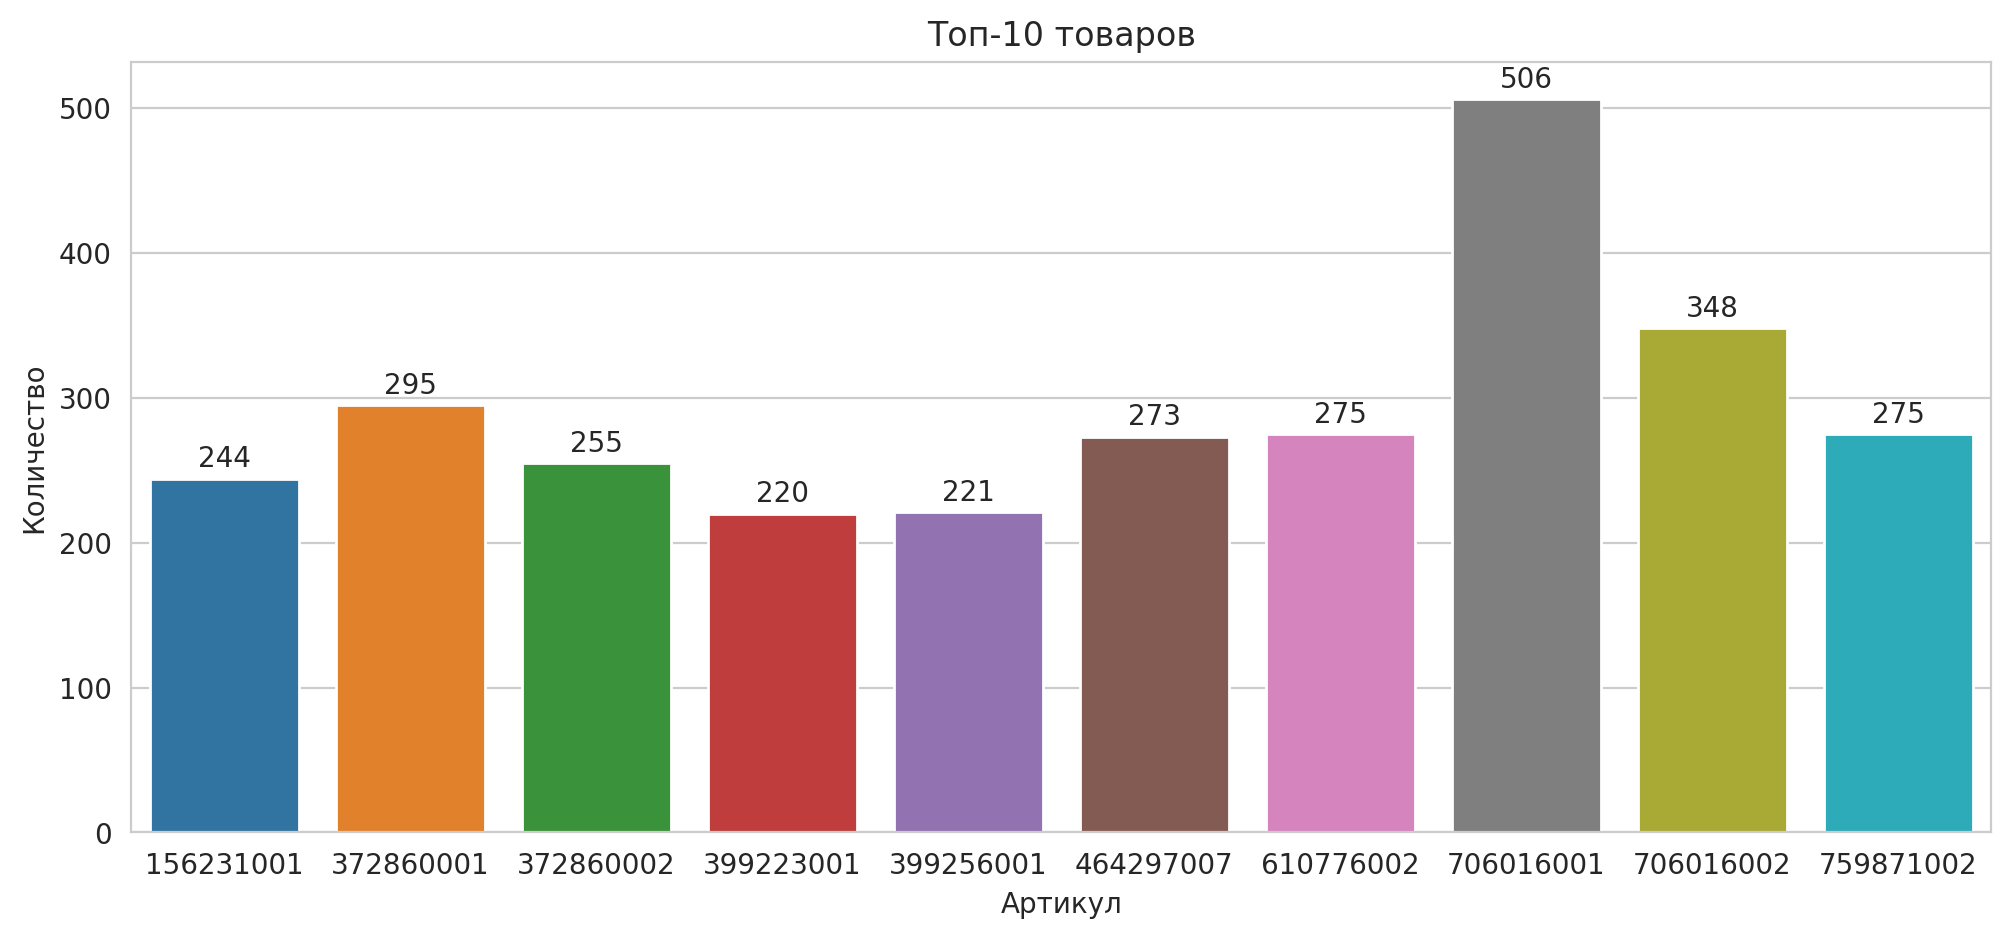

In [80]:
plt.figure(figsize=(12, 5))
plt.title('Топ-10 товаров')
graph = sns.barplot(data=df6, x="Артикул", y="Количество");
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10)

#### $\blacktriangleright$ Диаграмма ТОП 10 (по количеству) товаров по наименованию товара.

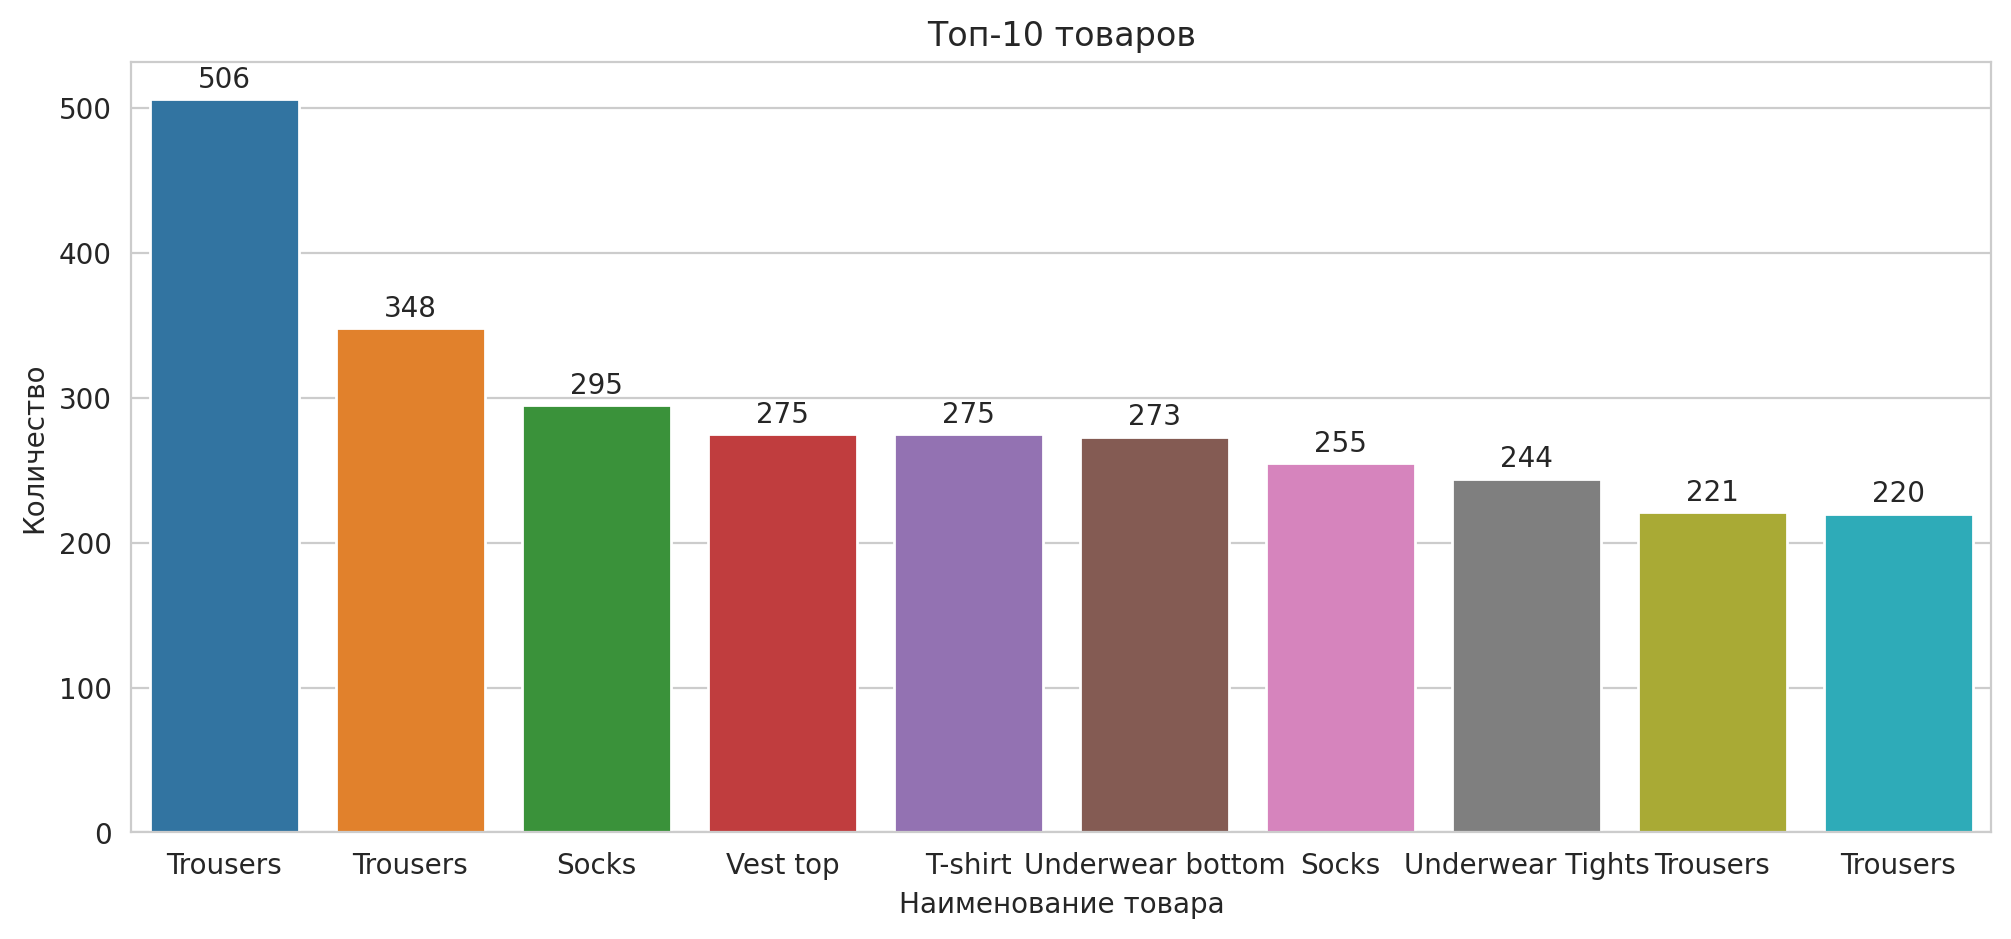

In [81]:
plt.figure(figsize=(12, 5))
plt.xlabel('Наименование товара')
plt.ylabel('Количество')
plt.title('Топ-10 товаров')
graph = sns.barplot(data=df6, x = df6.index, y="Количество");
plt.xticks(ticks = df6.index, labels = df6['Товар'].values)
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10);

#### $\blacktriangleright$ Диаграмма товаров, которых купили наибольшее количество без учета артикула.

In [82]:
fig = px.bar(df6, x='Товар', y='Количество', color='Цвет', text_auto=True)
fig.show();

#### $\blacktriangleright$ Диаграмма ТОП 10 (по количеству) товаров по полному наименованию товара.

In [83]:
fig = px.bar(df6, x='Полное наименование товара', y='Количество', color='Полное наименование товара', text_auto=True)
fig.show();

#### 📍 Вывод: Наибольшей популярностью пользуются черные брюки различных моделей.

 ### 4. Определим долю товаров, которые были проданы один раз, построим круговую диаграмму.

In [84]:
df7 = df_count[df_count['Количество'] == 1][['Товар','Количество']] \
                        .sort_values(['Количество'], ascending=False)
df7

,Товар,Количество
48130,Dress,1
37271,Trousers,1
37174,Dress,1
37158,Trousers,1
37145,Trousers,1
...,...,...
53621,Blazer,1
53622,Blazer,1
53623,Pyjama jumpsuit/playsuit,1
53624,Pyjama jumpsuit/playsuit,1


#### $\blacktriangleright$ Найдем количество товаров купленных много раз и один раз. Под много раз будем понимать 2 и более раз.

In [85]:
part1 = len(df_count)-len(df7)
part2  = len(df7)
print('\033[34m\033[1m Товаров купленных много раз - \033[0m %0.0f' % part1)
print('\033[34m\033[1m Товаров купленных один раз - \033[0m %0.0f' % part2)

 Товаров купленных много раз -  37145
 Товаров купленных один раз -  16481


#### $\blacktriangleright$ Построим круговую диаграмму соотношения количества товаров купленных много раз и один раз.

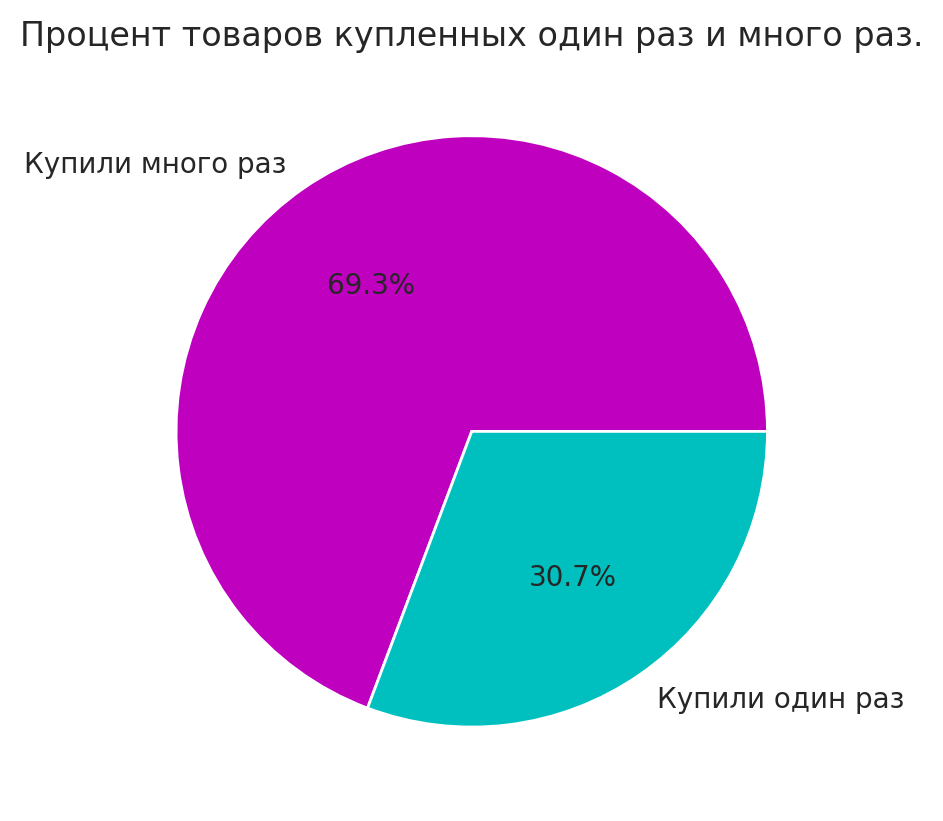

In [86]:
plt.pie([(len(df_count)-len(df7)), len(df7)], labels = ['Купили много раз', 'Купили один раз'], 
        colors = ['m','c'], autopct='%1.1f%%');
plt.title('Процент товаров купленных один раз и много раз.');

### 5. Определим какая возрастная группа покупает больше товаров, группы сформируем с шагом 10 лет, построим столбчатую диаграмму и график плотности распределения.

In [87]:
df_cust_qty = df1["customer_id"].value_counts().reset_index() \
            .rename(columns = {"customer_id":"sold_qty","index":"customer_id"})
df_cust_qty = df_cust_qty.merge(df2, how='left', left_on='customer_id', right_on='customer_id') \
            .sort_values(['sold_qty'],ascending=False)
df_cust_qty

,customer_id,sold_qty,club_member,fashion_news,age
0,23883,21,ACTIVE,Regularly,61.0
2,7232,19,ACTIVE,Regularly,54.0
1,2458,19,ACTIVE,NONE,31.0
3,5919,17,ACTIVE,Regularly,28.0
4,18097,16,ACTIVE,NONE,43.0
...,...,...,...,...,...
115089,198576,1,ACTIVE,NONE,61.0
115090,205582,1,ACTIVE,Regularly,61.0
115091,205581,1,ACTIVE,Regularly,23.0
115092,198577,1,ACTIVE,NONE,22.0


#### $\blacktriangleright$ Разделим пользователей на возрастные группы.

In [88]:
df_cust_qty['age_groups'] = pd.cut(df_cust_qty['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], 
                                   labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])
df_cust_qty

,customer_id,sold_qty,club_member,fashion_news,age,age_groups
0,23883,21,ACTIVE,Regularly,61.0,60-70
2,7232,19,ACTIVE,Regularly,54.0,50-60
1,2458,19,ACTIVE,NONE,31.0,30-40
3,5919,17,ACTIVE,Regularly,28.0,20-30
4,18097,16,ACTIVE,NONE,43.0,40-50
...,...,...,...,...,...,...
115089,198576,1,ACTIVE,NONE,61.0,60-70
115090,205582,1,ACTIVE,Regularly,61.0,60-70
115091,205581,1,ACTIVE,Regularly,23.0,20-30
115092,198577,1,ACTIVE,NONE,22.0,20-30


#### $\blacktriangleright$ Сгруппируем количество товаров по группам пользователей.

In [89]:
colums_to_show = ['sold_qty']
df8 = df_cust_qty.groupby(by = ['age_groups'])[colums_to_show].count()\
                                         .sort_values(['sold_qty'], ascending= False) \
                                         .reset_index()
df8.rename(columns = {'age_groups': 'Группы','sold_qty': 'Количество'} , inplace=True)
df8

,Группы,Количество
0,20-30,97642
1,30-40,39267
2,40-50,37160
3,50-60,34133
4,16-20,12466
5,60-70,7673
6,70+,1449


#### $\blacktriangleright$ Диаграмма распределения количества товаров по возрастным группам пользователей.

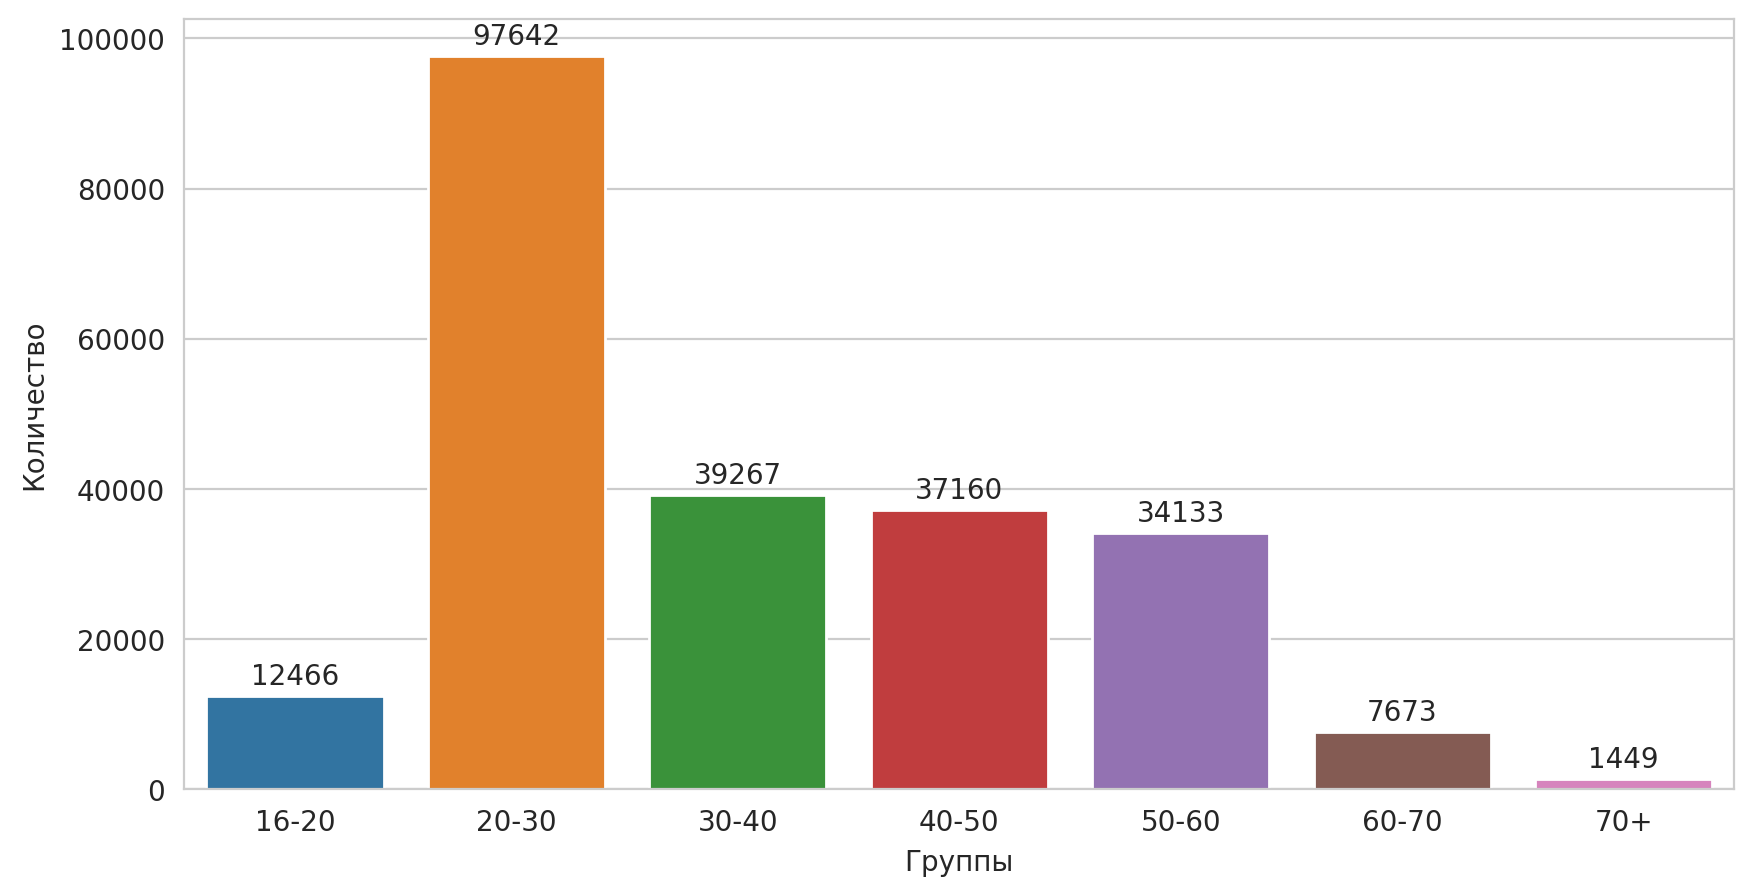

In [90]:
plt.figure(figsize=(10, 5))
graph = sns.barplot(data=df8, x="Группы", y="Количество");
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.0f', fontsize = 10)

#### $\blacktriangleright$ График плотности распределения.

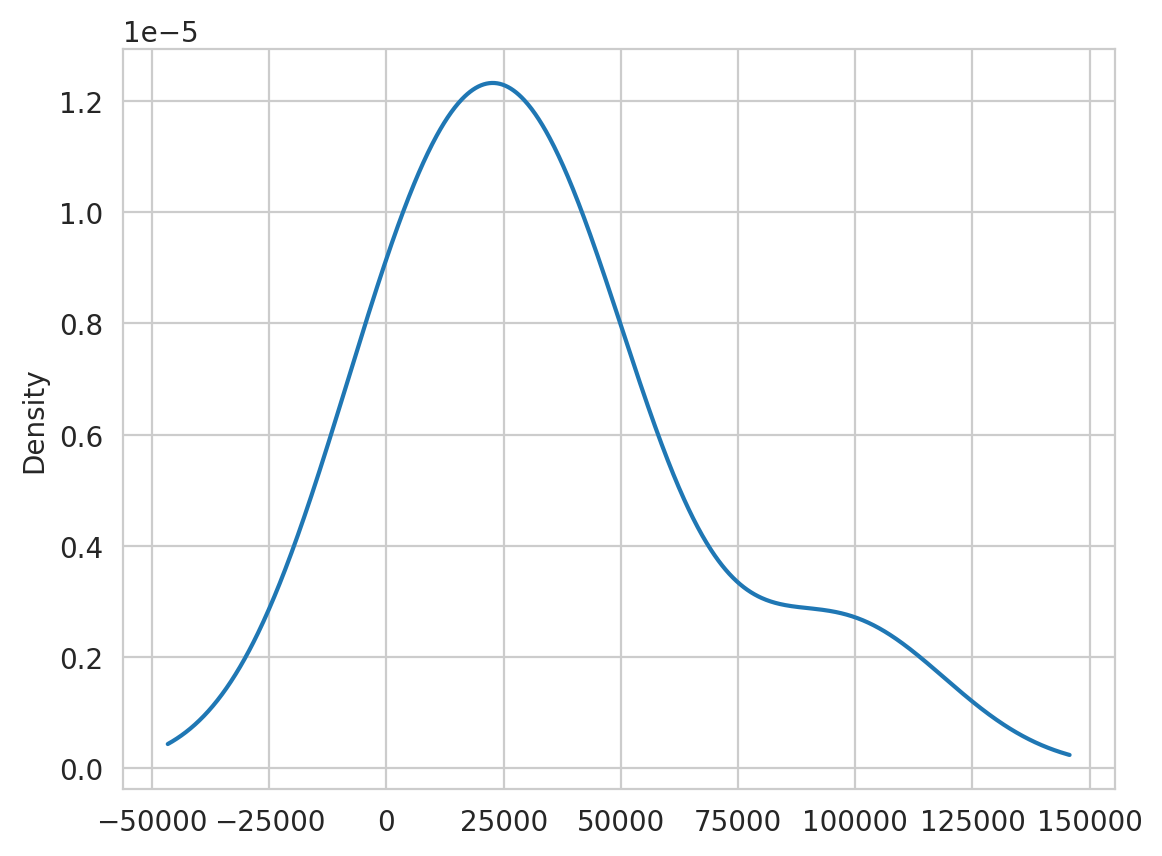

In [91]:
s = df8['Количество']
s.plot.kde();

#### $\blacktriangleright$ Диаграмма частот.

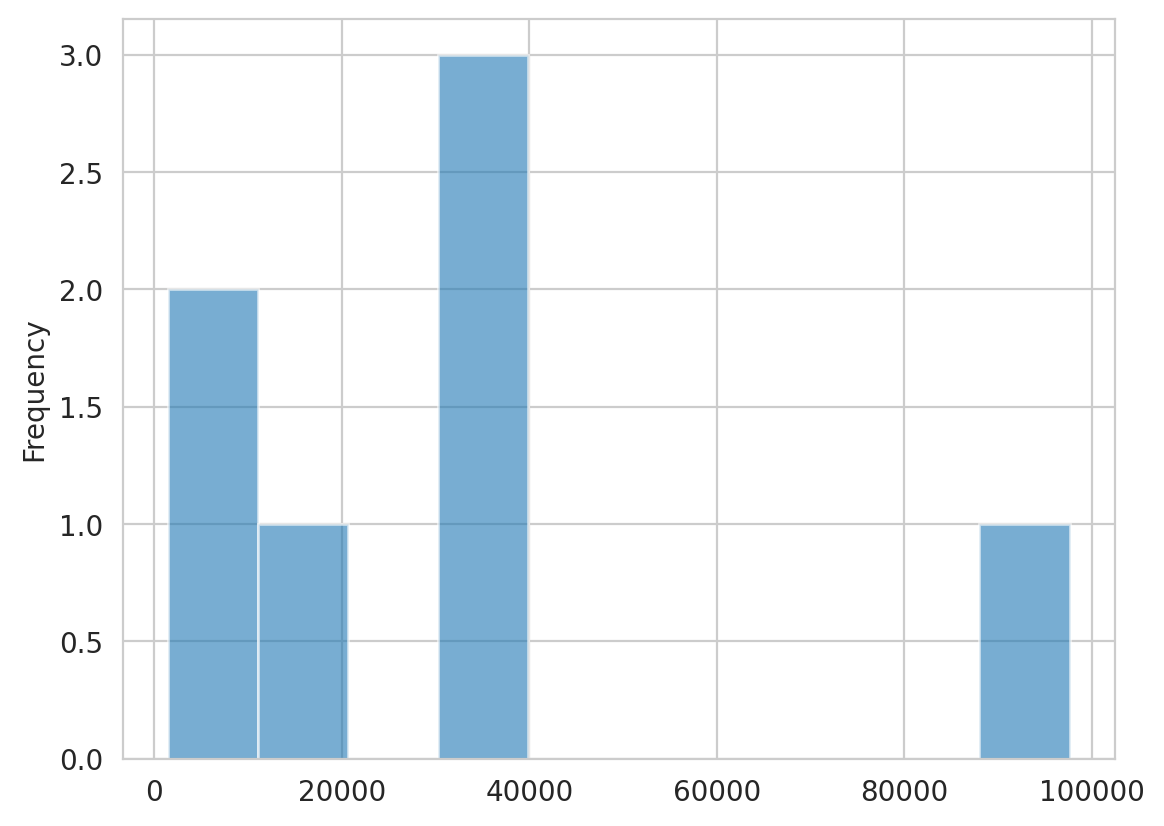

In [92]:
s.plot.hist(alpha=0.6);

#### 📍 Вывод: Наибольшее количество покупок совершили пользователи возрастной группы 20-30 лет.

### 6. Определим покупают ли больше товаров те, кто активно следит за новостями о моде, построим стобчатую диаграмму.

In [93]:
df_cust_qty.fashion_news.unique()

array(['Regularly', 'NONE', 'Monthly'], dtype=object)

#### $\blacktriangleright$ Найдем количество покупок всех пользователей тех, кто активно следит за новостями о моде.

In [94]:
df9 = df_cust_qty[df_cust_qty['fashion_news']=='Regularly'][['customer_id','sold_qty','fashion_news','age_groups']] \
                                                .sort_values(['sold_qty'], ascending=False)
regularly = df9['sold_qty'].sum()
print('\033[34m\033[1m Кол-во покупок пользователей регулярно следящих за новостями о моде - \033[0m %0.0f' \
      % regularly)

 Кол-во покупок пользователей регулярно следящих за новостями о моде -  135411


#### $\blacktriangleright$ Найдем количество покупок всех пользователей тех, кто вообще не следит за новостями о моде.

In [95]:
df10 = df_cust_qty[df_cust_qty['fashion_news'] == 'NONE'][['customer_id','sold_qty','fashion_news','age_groups']] \
.sort_values(['sold_qty'], ascending=False)
none = df10['sold_qty'].sum()
print('\033[34m\033[1m Кол-во покупок пользователей тех, кто вообще не следит за новостями о моде - \033[0m %0.0f' \
      % none)

 Кол-во покупок пользователей тех, кто вообще не следит за новостями о моде -  182373


#### $\blacktriangleright$ Найдем количество покупок всех пользователей тех, кто следит за новостями о моде раз в месяц.

In [96]:
df11 = df_cust_qty[df_cust_qty['fashion_news'] == 'Monthly'][['customer_id','sold_qty','fashion_news','age_groups']] \
                .sort_values(['sold_qty'], ascending=False)
monthly = df11['sold_qty'].sum()
print('\033[34m\033[1m Кол-во покупок пользователей тех, кто следит за новостями о моде раз в месяц - \033[0m %0.0f' \
      % monthly)

 Кол-во покупок пользователей тех, кто следит за новостями о моде раз в месяц -  100


#### $\blacktriangleright$ Найдем общее количество покупок всех пользователей во всех трех категориях.

In [97]:
df12 = df_cust_qty
df12.rename(columns = {'fashion_news': 'Новости моды','sold_qty': 'Количество'} , inplace=True)
total = df12['Количество'].sum()
print('\033[34m\033[1m Общее количество покупок всех пользователей во всех трех категориях - \033[0m %0.0f' \
      % total)

 Общее количество покупок всех пользователей во всех трех категориях -  317884


#### $\blacktriangleright$ Найдем процент покупок всех пользователей во всех трех категориях.

In [98]:
regularly_proc = regularly/total*100
monthly_proc = monthly/total*100
none_proc = none/total*100
print('\033[34m\033[1m Смотрели новости регулярно - \033[0m %0.1f' % regularly_proc, '%') 
print('\033[34m\033[1m Смотрели новости раз в месяц - \033[0m %0.2f' % monthly_proc, '%') 
print('\033[34m\033[1m Не смотрели новости - \033[0m %0.1f' % none_proc, '%')

 Смотрели новости регулярно -  42.6 %
 Смотрели новости раз в месяц -  0.03 %
 Не смотрели новости -  57.4 %


#### $\blacktriangleright$ Создадим датафрейм и построим диаграмму.

In [99]:
df13 = pd.DataFrame({
'Новости моды': [ 'Regularly', 'Monthly', 'NONE'],
'Процент покупок': [regularly_proc, monthly_proc, none_proc]
})
df13

,Новости моды,Процент покупок
0,Regularly,42.597614
1,Monthly,0.031458
2,NONE,57.370928


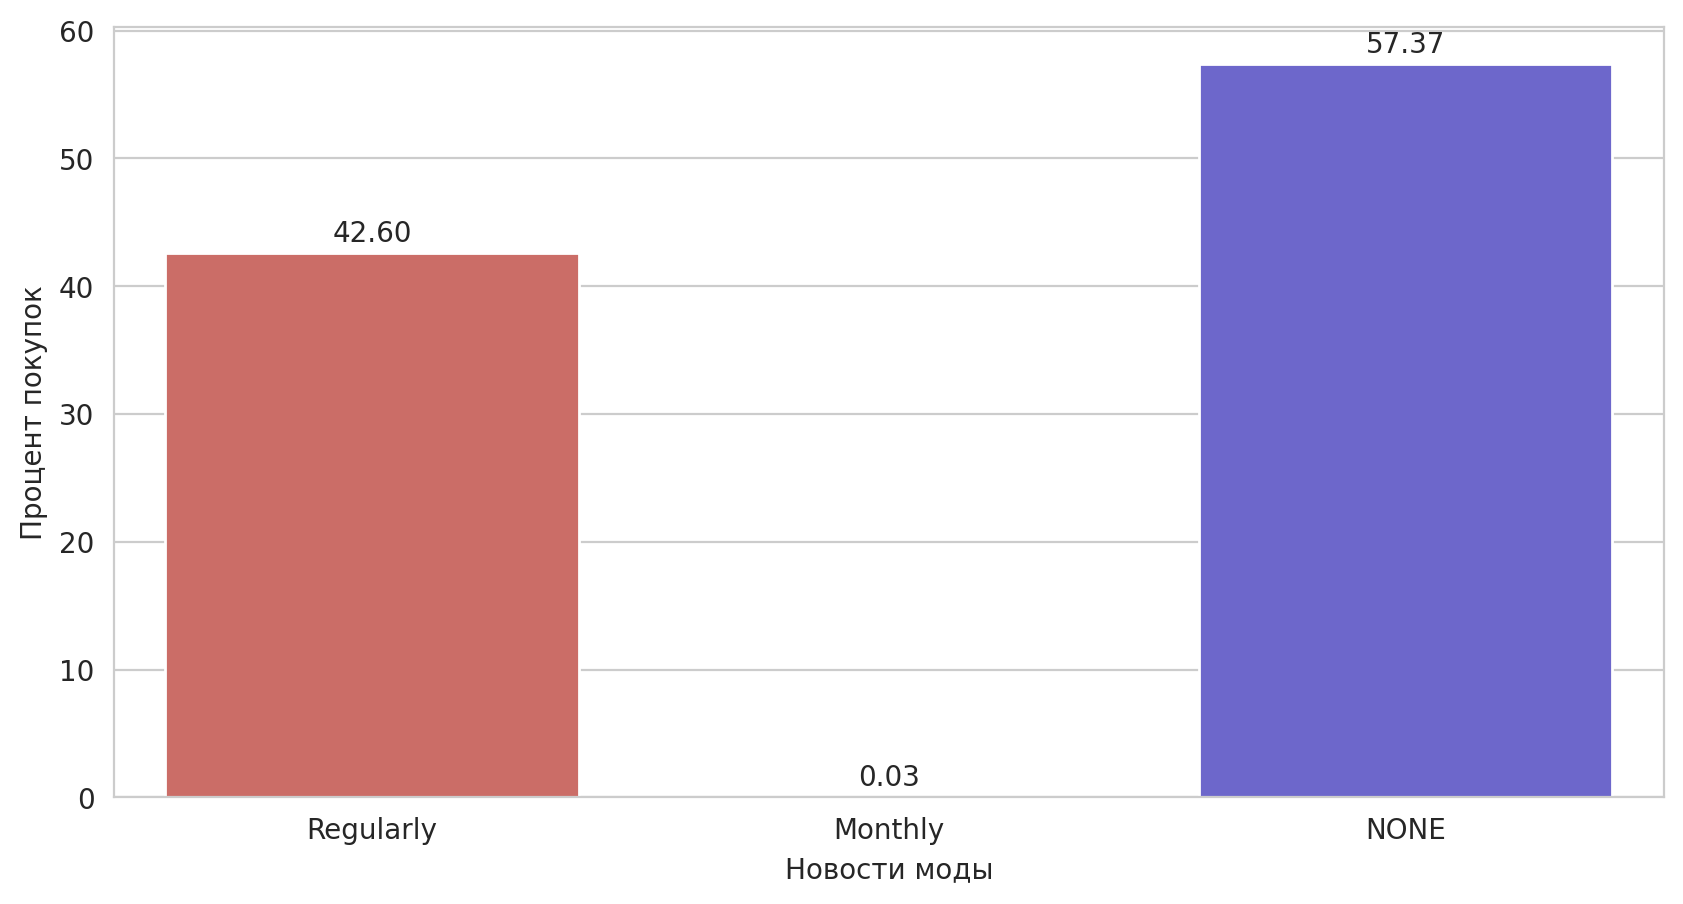

In [100]:
plt.figure(figsize=(10, 5))
graph = sns.barplot(data=df13, x='Новости моды', y='Процент покупок', palette='hls');
for c in graph.containers:
    graph.bar_label(c, padding = 2, fmt = '%.2f', fontsize = 10)

#### 📍 Вывод: Наибольшее количество покупок совершили пользователи, которые не смотрели новости моды.

## <span style="color:green"> $\checkmark$ </span> Шаг 5. Анализ взаимосвязи признаков.

 ### $\blacktriangleright$ Проверим гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найдем p-value, сформулируем вывод.


$\blacktriangleright$ Сформулируем гипотезы: 

$H_0:\text{признаки независимы (связи нет)}$.

$H_1:\text{признаки не являются независимыми (связь есть)}$. 

In [101]:
df_cust_qty.club_member.unique()

array(['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [102]:
df14 = df_cust_qty
df14

,customer_id,Количество,club_member,Новости моды,age,age_groups
0,23883,21,ACTIVE,Regularly,61.0,60-70
2,7232,19,ACTIVE,Regularly,54.0,50-60
1,2458,19,ACTIVE,NONE,31.0,30-40
3,5919,17,ACTIVE,Regularly,28.0,20-30
4,18097,16,ACTIVE,NONE,43.0,40-50
...,...,...,...,...,...,...
115089,198576,1,ACTIVE,NONE,61.0,60-70
115090,205582,1,ACTIVE,Regularly,61.0,60-70
115091,205581,1,ACTIVE,Regularly,23.0,20-30
115092,198577,1,ACTIVE,NONE,22.0,20-30


#### $\blacktriangleright$ Построим круговую диаграмму для соотношения значений в признаке club_member.

In [103]:
yes = (df14['club_member'] == 'ACTIVE').sum()
maybe = (df14['club_member'] == 'PRE-CREATE').sum()
no = (df14['club_member'] == 'LEFT CLUB').sum()
print('\033[34m\033[1m Активный член клуба - \033[0m %0.0f' % yes, '\033[34m\033[1m покупателей.\033[0m')
print('\033[34m\033[1m Может стать - \033[0m %0.0f' % maybe, '\033[34m\033[1m покупателей.\033[0m')
print('\033[34m\033[1m Покинуло клуб - \033[0m %0.0f'% no, '\033[34m\033[1m покупателей.\033[0m')

 Активный член клуба -  223736  покупателей.
 Может стать -  6008  покупателей.
 Покинуло клуб -  60  покупателей.


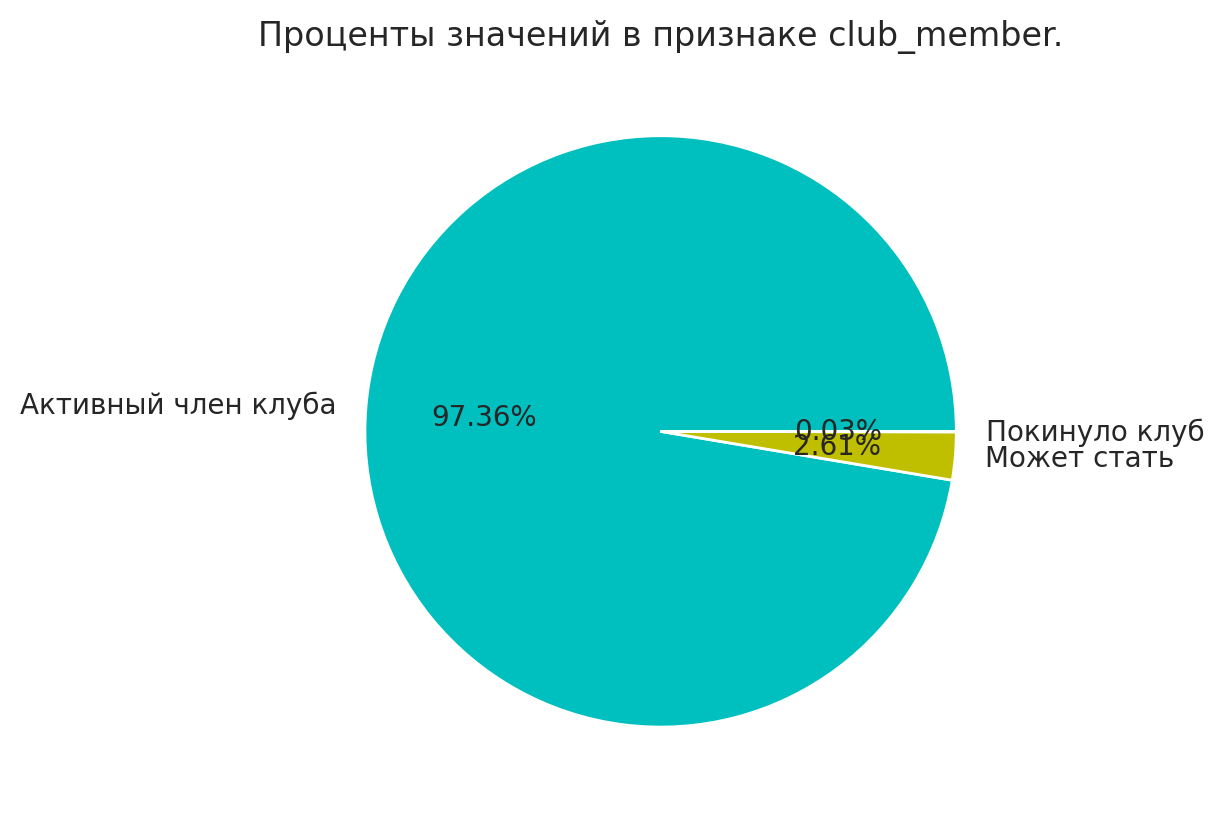

In [104]:
plt.pie([yes, maybe, no ], labels = ['Активный член клуба','Может стать', 'Покинуло клуб'], 
        colors = ['c','y','b'], autopct='%1.2f%%');
plt.title('Проценты значений в признаке club_member.');

#### $\blacktriangleright$ Как видно из диаграммы - значений "Покинул клуб" очень мало.

#### $\blacktriangleright$ Построим кросс-таблицу по признакам club_memder и Количество .

In [105]:
df15= pd.crosstab(df14['club_member'], df14['Количество'])
df15.head()

Количество,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,21
club_member,,,,,,,,,,,,,,,,,,,
ACTIVE,166554,38872,11601,3976,1518,608,314,138,73,36,18,9,5,5,2,3,1,2,1
LEFT CLUB,50,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRE-CREATE,5470,454,65,14,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### $\blacktriangleright$ Найдем коэффициент $\chi^2$ и значение p-value.

In [106]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df14['club_member'], df14['Количество']))
# коэффициент $\chi^2$
print('Хи-квадрат %0.2f p-value %0.3f' % (chi2, p))

Хи-квадрат 886.16 p-value 0.000


In [107]:
df24 = df1["customer_id"].value_counts().reset_index() \
            .rename(columns = {"customer_id":"Количество","index":"customer_id"}) \
            .sort_values(['customer_id'], ascending=True).reset_index()
df24

,index,customer_id,Количество
0,28324,0,2
1,192926,1,1
2,169053,2,1
3,169054,3,1
4,57540,4,2
...,...,...,...
229799,81207,229799,1
229800,81218,229800,1
229801,81216,229801,1
229802,81214,229802,1


In [108]:
df24 = df24.drop(columns=['index'])
df24

,customer_id,Количество
0,0,2
1,1,1
2,2,1
3,3,1
4,4,2
...,...,...
229799,229799,1
229800,229800,1
229801,229801,1
229802,229802,1


In [109]:
df26 = df2.sort_values(['customer_id'], ascending=True).reset_index()
df26

,index,club_member,fashion_news,age,customer_id
0,49786,PRE-CREATE,NONE,25.0,0
1,221796,ACTIVE,Regularly,24.0,1
2,90512,ACTIVE,Monthly,45.0,2
3,121091,ACTIVE,NONE,48.0,3
4,93707,ACTIVE,Regularly,23.0,4
...,...,...,...,...,...
229799,200074,ACTIVE,NONE,27.0,229799
229800,193929,ACTIVE,NONE,48.0,229800
229801,194357,ACTIVE,Regularly,23.0,229801
229802,24413,ACTIVE,Regularly,21.0,229802


In [110]:
df26 = df26.drop(columns=['index'])
df26

,club_member,fashion_news,age,customer_id
0,PRE-CREATE,NONE,25.0,0
1,ACTIVE,Regularly,24.0,1
2,ACTIVE,Monthly,45.0,2
3,ACTIVE,NONE,48.0,3
4,ACTIVE,Regularly,23.0,4
...,...,...,...,...
229799,ACTIVE,NONE,27.0,229799
229800,ACTIVE,NONE,48.0,229800
229801,ACTIVE,Regularly,23.0,229801
229802,ACTIVE,Regularly,21.0,229802


In [111]:
df25= pd.crosstab(df26['club_member'], df24['Количество'])
df25

Количество,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,21
club_member,,,,,,,,,,,,,,,,,,,
ACTIVE,166554,38872,11601,3976,1518,608,314,138,73,36,18,9,5,5,2,3,1,2,1
LEFT CLUB,50,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRE-CREATE,5470,454,65,14,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df26['club_member'], df24['Количество']))
# коэффициент $\chi^2$
print('Хи-квадрат %0.2f p-value %0.3f' % (chi2, p))

Хи-квадрат 886.16 p-value 0.000


#### 📍 Вывод: Поскольку Хи-квадрат 886.16, а p-value 0.000 то это говорит о том, что нулевая гипотеза  может быть отвергнута. Связь статистически подтверждается. Статус членства клуба влияет на количество купленных товаров.

## <span style="color:green"> $\checkmark$ </span> Шаг 6. Кластеризация по покупателям.

### 1. Сформируем датасет с признаками покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей.


In [113]:
df16 = df1.groupby(by = ['customer_id'])['article_id'].count().reset_index()
df16.rename(columns = {'article_id': 'Кол-во товаров'}, inplace=True)
df17 = df1.groupby(by = ['customer_id'])['price'].sum().reset_index()
df17.rename(columns = {'price': 'Сумма'}, inplace=True)
df18 = df16.merge(df17, how='left', left_on='customer_id', right_on='customer_id')
df19 = df18.merge(df2, how='left', left_on='customer_id', right_on='customer_id')
df19.rename(columns = {'customer_id':'Покупатель',
                       'club_member':'Член клуба', 
                       'fashion_news':'Новости моды',
                       'age':'Возраст'}, inplace=True)
df19 = df19.sort_values(['Сумма'], ascending= False)
df19

,Покупатель,Кол-во товаров,Сумма,Член клуба,Новости моды,Возраст
23883,23883,21,935.43,ACTIVE,Regularly,61.0
13106,13106,6,835.53,ACTIVE,Regularly,61.0
5919,5919,17,771.61,ACTIVE,Regularly,28.0
22287,22287,14,699.79,ACTIVE,Regularly,61.0
17778,17778,8,675.35,ACTIVE,NONE,52.0
...,...,...,...,...,...,...
90121,90121,1,0.61,ACTIVE,NONE,22.0
190005,190005,1,0.56,ACTIVE,Regularly,47.0
212262,212262,1,0.42,ACTIVE,Regularly,42.0
156250,156250,1,0.42,ACTIVE,NONE,23.0


#### $\blacktriangleright$ Заменим значения категориальных признаков Член клуба и Новости моды цифрами.

In [114]:
df19['Член клуба'].unique()

array(['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [115]:
df19['Новости моды'].unique()

array(['Regularly', 'NONE', 'Monthly'], dtype=object)

#### $\blacktriangleright$ Используем replace.

In [116]:
df19['Член клуба'] = df19['Член клуба'].replace('PRE-CREATE','2')
df19['Член клуба'] = df19['Член клуба'].replace('ACTIVE','1')
df19['Член клуба'] = df19['Член клуба'].replace('LEFT CLUB','0')
df19['Новости моды'] = df19['Новости моды'].replace('Regularly','1')
df19['Новости моды'] = df19['Новости моды'].replace('Monthly','2')
df19['Новости моды'] = df19['Новости моды'].replace('NONE','0')

#### $\blacktriangleright$ Исключим из датафрейма признак Покупатель.

In [117]:
df20 = df19[['Кол-во товаров', 'Сумма', 'Член клуба', 'Новости моды', 'Возраст']]
               
df20

,Кол-во товаров,Сумма,Член клуба,Новости моды,Возраст
23883,21,935.43,1,1,61.0
13106,6,835.53,1,1,61.0
5919,17,771.61,1,1,28.0
22287,14,699.79,1,1,61.0
17778,8,675.35,1,0,52.0
...,...,...,...,...,...
90121,1,0.61,1,0,22.0
190005,1,0.56,1,1,47.0
212262,1,0.42,1,1,42.0
156250,1,0.42,1,0,23.0


### 2. Найдем оптимальное количество кластеров по оставшимся признакам.

#### $\blacktriangleright$ Используем Метод локтя.

In [118]:
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler

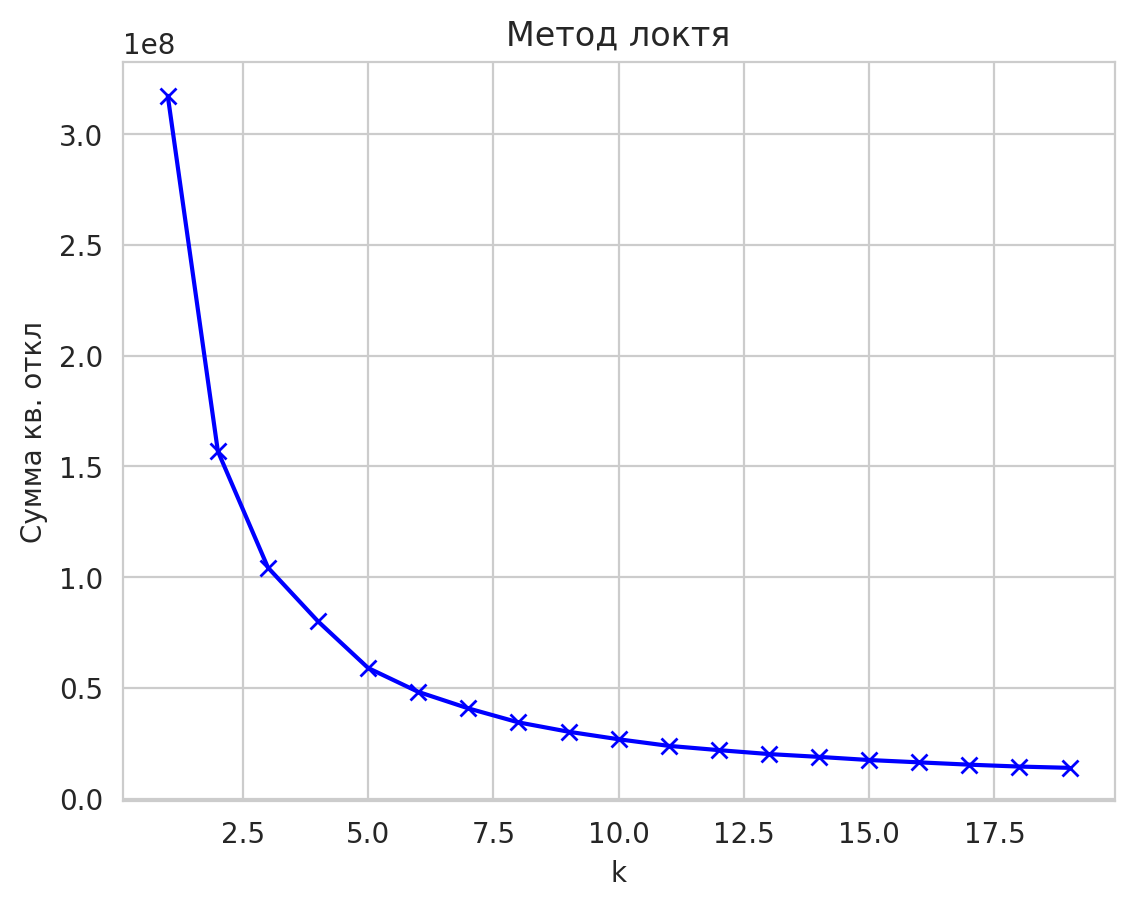

In [119]:
Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df20)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

#### $\blacktriangleright$ После осмотра графика выбираем количество кластеров равное 4.

### 3. Построим модель кластеризации данных.

In [120]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df20)

predict = kmeans.predict(df20)
df20['Кластер'] = predict
df20

,Кол-во товаров,Сумма,Член клуба,Новости моды,Возраст,Кластер
23883,21,935.43,1,1,61.0,1
13106,6,835.53,1,1,61.0,1
5919,17,771.61,1,1,28.0,1
22287,14,699.79,1,1,61.0,1
17778,8,675.35,1,0,52.0,1
...,...,...,...,...,...,...
90121,1,0.61,1,0,22.0,2
190005,1,0.56,1,1,47.0,0
212262,1,0.42,1,1,42.0,0
156250,1,0.42,1,0,23.0,2


### 4. Визуализируем кластеры с помощью диаграммы рассеивания, выберем подходящие признаки для диаграммы.

#### $\blacktriangleright$ Найдем важные признаки.

In [121]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = df20 
y = df20.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all') 
fit = bestfeatures.fit(X, y) 
dfscores = pd.DataFrame(fit.scores_) 
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1) 
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))


            Specs         Score
1           Сумма  5.504975e+06
4         Возраст  7.039893e+05
5         Кластер  1.719527e+05
0  Кол-во товаров  4.987108e+04
3    Новости моды  3.172738e+02
2      Член клуба  9.155946e+00


#### $\blacktriangleright$Построим диаграммы рассеивания.

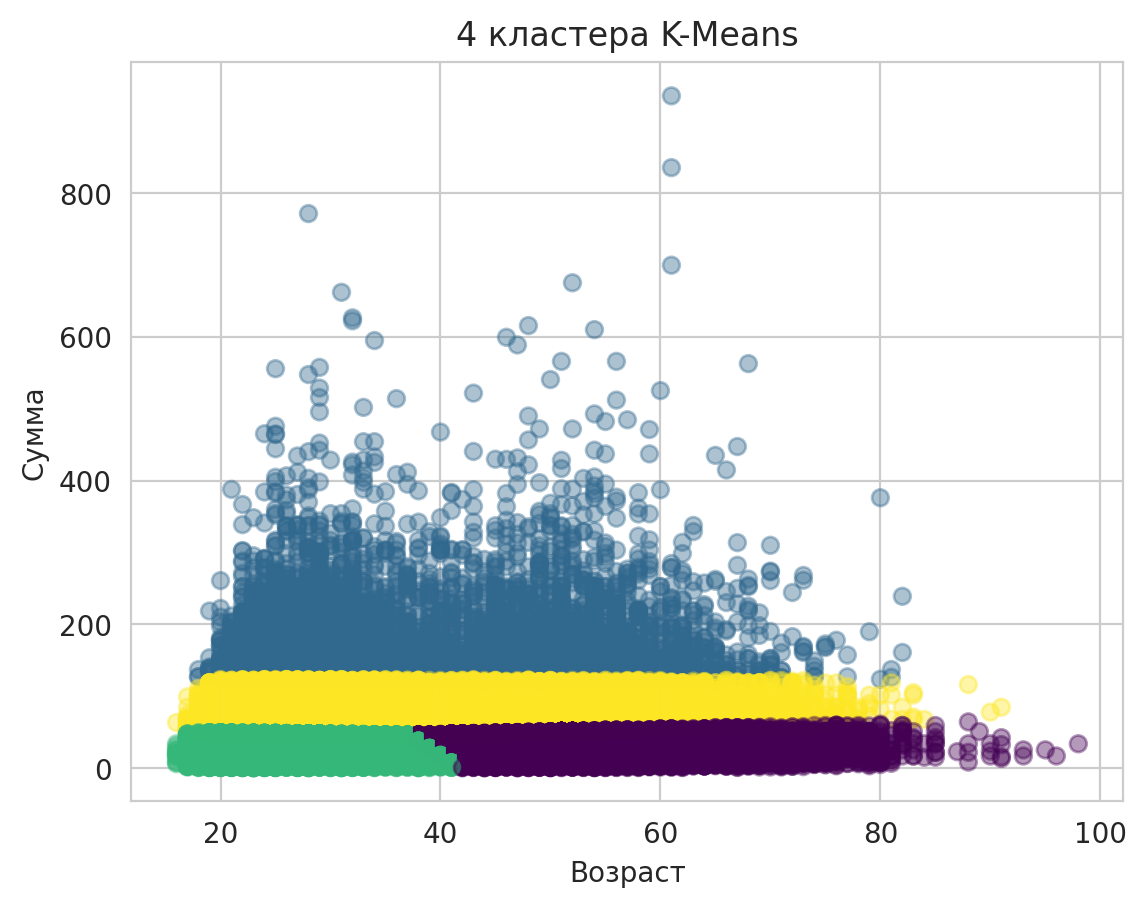

In [122]:
plt.scatter(df20['Возраст'], df20["Сумма"], c = df20['Кластер'], cmap='viridis', alpha = 0.4)
plt.xlabel('Возраст')
plt.ylabel('Сумма')
plt.title('4 кластера K-Means')
plt.show()

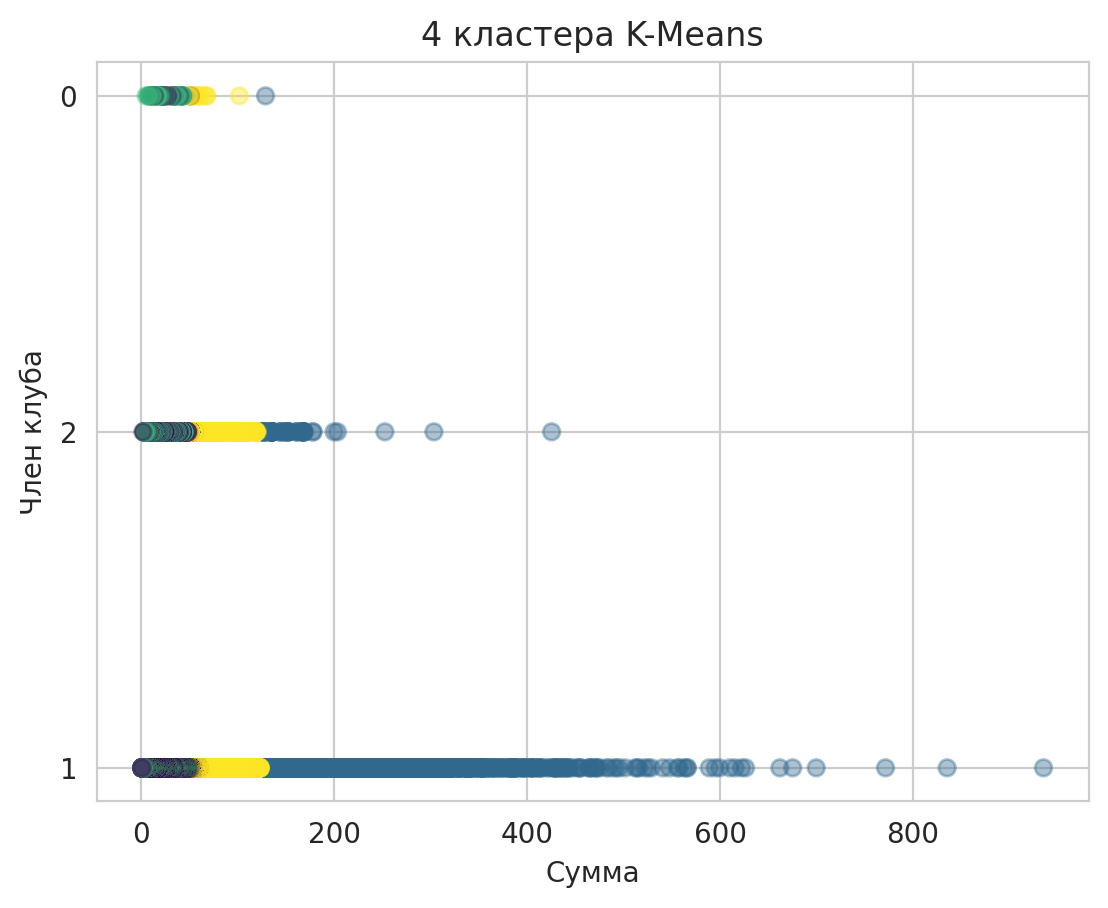

In [123]:
plt.scatter(df20['Сумма'], df20['Член клуба'], c = df20['Кластер'], cmap='viridis', alpha = 0.4)
plt.xlabel('Сумма')
plt.ylabel('Член клуба')
plt.title('4 кластера K-Means')
plt.show()

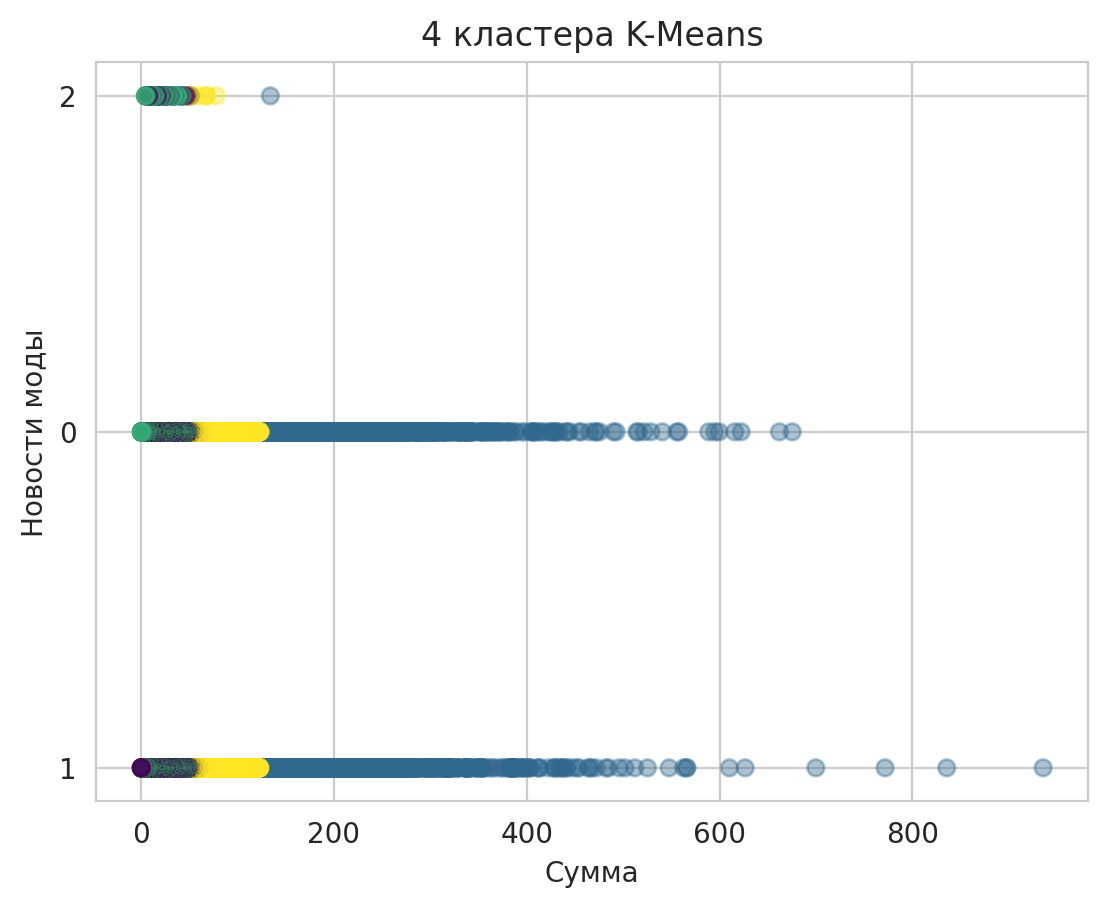

In [124]:
plt.scatter(df20['Сумма'], df20["Новости моды"], c = df20['Кластер'], cmap='viridis', alpha = 0.4)
plt.xlabel('Сумма')
plt.ylabel('Новости моды')
plt.title('4 кластера K-Means')
plt.show()

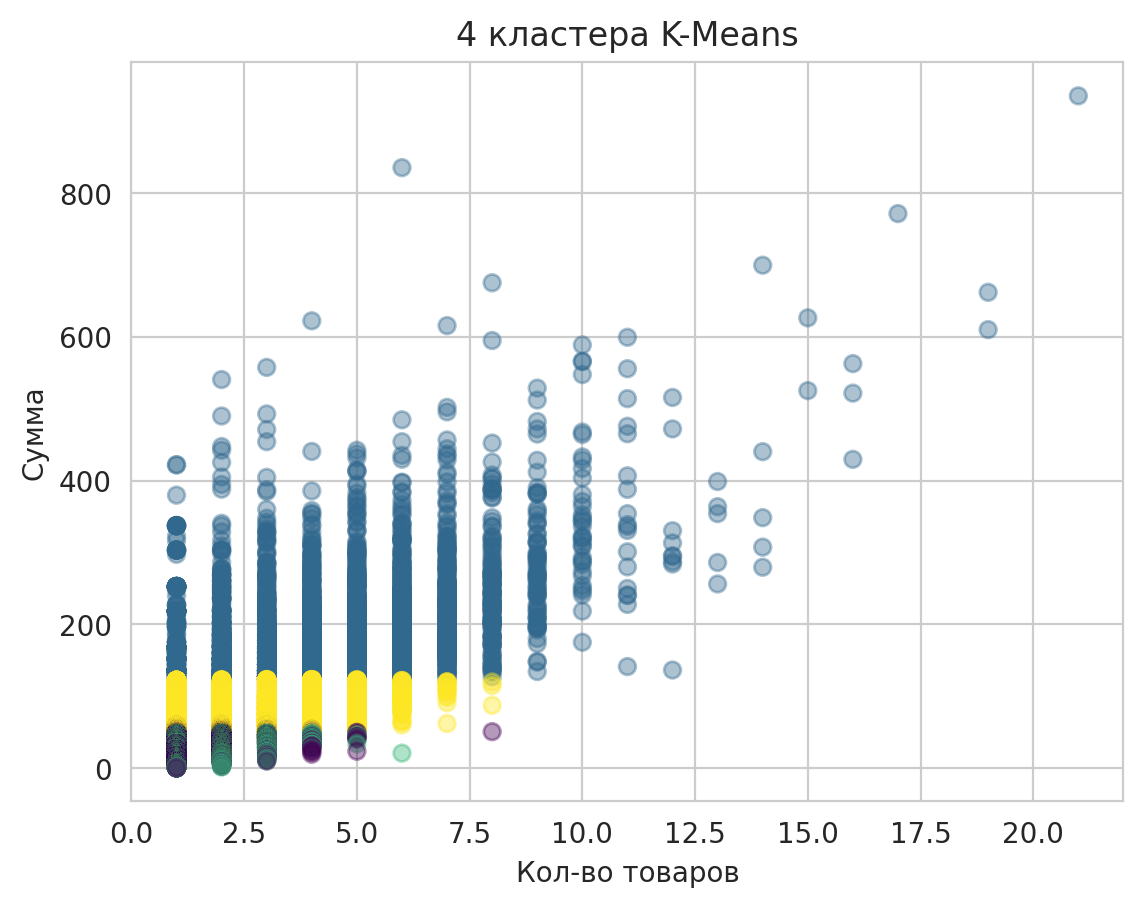

In [125]:
plt.scatter(df20['Кол-во товаров'], df20["Сумма"], c = df20['Кластер'], cmap='viridis', alpha = 0.4)
plt.xlabel('Кол-во товаров')
plt.ylabel('Сумма')
plt.title('4 кластера K-Means')
plt.show()

#### $\blacktriangleright$ Восстановим датафрейм с признаками Покупатель и Кластер.

In [126]:
df19['Кластер'] = predict
df19

,Покупатель,Кол-во товаров,Сумма,Член клуба,Новости моды,Возраст,Кластер
23883,23883,21,935.43,1,1,61.0,1
13106,13106,6,835.53,1,1,61.0,1
5919,5919,17,771.61,1,1,28.0,1
22287,22287,14,699.79,1,1,61.0,1
17778,17778,8,675.35,1,0,52.0,1
...,...,...,...,...,...,...,...
90121,90121,1,0.61,1,0,22.0,2
190005,190005,1,0.56,1,1,47.0,0
212262,212262,1,0.42,1,1,42.0,0
156250,156250,1,0.42,1,0,23.0,2


#### $\blacktriangleright$ Сравним полученный датафрейм с признаками Покупатель и Кластер с переданным на кластеризацию.

In [127]:
df20

,Кол-во товаров,Сумма,Член клуба,Новости моды,Возраст,Кластер
23883,21,935.43,1,1,61.0,1
13106,6,835.53,1,1,61.0,1
5919,17,771.61,1,1,28.0,1
22287,14,699.79,1,1,61.0,1
17778,8,675.35,1,0,52.0,1
...,...,...,...,...,...,...
90121,1,0.61,1,0,22.0,2
190005,1,0.56,1,1,47.0,0
212262,1,0.42,1,1,42.0,0
156250,1,0.42,1,0,23.0,2


## <span style="color:green"> $\checkmark$ </span> Шаг 7. Построение рекомендательной системы.

### 1. Сформируем датасет с признаками покупатель, товар, количество купленных товаров.

In [128]:
df_count1 = df1[['t_dat',"article_id"]].groupby("article_id").count().sort_values(by='t_dat', ascending=False) \
            .rename(columns={'t_dat':"Количество"}) \
            .reset_index()
df_count1 = df_count1.merge(df3, how='left', left_on='article_id', right_on='article_id') \
        .reset_index() \
        .sort_values(['Количество'], ascending=False) \
        .rename(columns={'index' : 'Покупатель','article_id': "Артикул",'product_name': "Товар", 'color': "Цвет"})
df_count1

,Покупатель,Артикул,Количество,Товар,Цвет
0,0,706016001,506,Trousers,Black
1,1,706016002,348,Trousers,Light Blue
2,2,372860001,295,Socks,Black
4,4,610776002,275,T-shirt,Black
3,3,759871002,275,Vest top,Black
...,...,...,...,...,...
42643,42643,653275025,1,T-shirt,Dark Green
42644,42644,653275024,1,T-shirt,Dark Blue
42645,42645,653275023,1,T-shirt,Orange
42646,42646,652886002,1,Trousers,Greenish Khaki


In [129]:
df_count2 = df1.merge(df3, how='left', left_on='article_id', right_on='article_id')
df_count2 = df_count2[['t_dat','customer_id','article_id']].groupby(['customer_id', 'article_id']).count() \
            .sort_values(by='customer_id', ascending=True) \
            .reset_index() \
            .rename(columns = {'t_dat':"Количество", 'customer_id' : 'Покупатель' ,'article_id': "Артикул"}) 
df_count2

,Покупатель,Артикул,Количество
0,0,706016003,1
1,0,812376001,1
2,1,493810014,1
3,2,594541012,1
4,3,719712001,1
...,...,...,...
317136,229799,636323001,1
317137,229800,657795001,1
317138,229801,636323001,1
317139,229802,589924010,1


#### $\blacktriangleright$ Переименуем признаки, сделаем срез.

In [130]:
df21=df_count2[['Покупатель','Артикул','Количество']]
df21.columns=['user','item','count']
df21 = df21.iloc[:20000,:]
df21

,user,item,count
0,0,706016003,1
1,0,812376001,1
2,1,493810014,1
3,2,594541012,1
4,3,719712001,1
...,...,...,...
19995,10748,576693001,1
19996,10748,543310001,1
19997,10749,821417004,1
19998,10749,824490003,1


### 2. Выполним коллаборативную фильтрацию по схожести покупателей.

#### $\blacktriangleright$ Вариант 1 sklearn.neighbors сходство по покупателю.

In [131]:
from scipy.sparse import csr_matrix 
from sklearn.neighbors import NearestNeighbors 

In [132]:
df_matrix = df21.pivot(index='user', columns='item', values='count').fillna(0)
w1_pivot_matrix = csr_matrix(df_matrix)

In [133]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(w1_pivot_matrix)

In [134]:
def most_similar_users_to(user_id):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(df_matrix.iloc[user_id,:].values.reshape(1,-1), n_neighbors=10)
    print('\033[34m\033[1m Рекомендации для ## {0} ##: \033[0m'.format(df_matrix.index[user_id]))
    for i in range(1, len(distance.flatten())):
        user_id1 = df_matrix.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)

    return most_similar_users_to[:10] 

### 3.1 Выведем в качестве рекомендаций список наименований товаров для покупателя с ИД = 6510.

In [135]:
print('\033[34m\033[1m Подобие (схожесть) на основе Покупателя \033[0m')
print(most_similar_users_to(6510))

 Подобие (схожесть) на основе Покупателя 
 Рекомендации для ## 6510 ##: 
[(7171, 1.0), (7164, 1.0), (7165, 1.0), (7166, 1.0), (7167, 1.0), (7168, 1.0), (7169, 1.0), (7170, 1.0), (7173, 1.0)]


In [136]:
from collections import defaultdict
spisok=[]
def user_based_suggestions(user_id):
    # суммировать все коэффициенты подобия
    suggestions = defaultdict(float)
    non_interacted_products = df_matrix.iloc[user_id][df_matrix.iloc[user_id]==0].index.tolist()
    for other_user_id, similarity in most_similar_users_to(user_id):
        products_user_id = df_matrix.loc[other_user_id][df_matrix.loc[other_user_id]>0]
        for interest in products_user_id.index.tolist():
            if interest in non_interacted_products:
                suggestions[interest] += similarity
                
    # преобразовать их в сортированный список
    suggestions = sorted(suggestions.items(),
                         key=lambda x: x[1],
                         reverse=True)
    spisok.append(suggestions[:10])
    return suggestions[:10]

In [137]:
print('\033[34m\033[1m Рекомендации для Покупателя \033[0m')
print(user_based_suggestions(6510))

 Рекомендации для Покупателя 
 Рекомендации для ## 6510 ##: 
[(681569002, 1.0), (737137003, 1.0), (828982004, 1.0), (842724003, 1.0), (377277025, 1.0), (882066001, 1.0), (480093001, 1.0), (730402001, 1.0), (740210002, 1.0), (756192002, 1.0)]


In [138]:
item1_1 = df3[df3['article_id'] == spisok[0][0][0]][['product_name', 'color']]
item2_1 = df3[df3['article_id'] == spisok[0][1][0]][['product_name', 'color']]
item3_1 = df3[df3['article_id'] == spisok[0][2][0]][['product_name', 'color']]
item4_1 = df3[df3['article_id'] == spisok[0][3][0]][['product_name', 'color']]
item5_1 = df3[df3['article_id'] == spisok[0][4][0]][['product_name', 'color']]
item6_1 = df3[df3['article_id'] == spisok[0][5][0]][['product_name', 'color']]
item7_1 = df3[df3['article_id'] == spisok[0][6][0]][['product_name', 'color']]
item8_1 = df3[df3['article_id'] == spisok[0][7][0]][['product_name', 'color']]
item9_1 = df3[df3['article_id'] == spisok[0][8][0]][['product_name', 'color']]
item10_1 = df3[df3['article_id'] == spisok[0][9][0]][['product_name', 'color']]
result = pd.concat([item1_1, item2_1, item3_1, item4_1, item5_1, item6_1, 
                    item7_1, item8_1 , item9_1, item10_1], axis=0).reset_index()\
                    .rename(columns = {'product_name':"Наименование товара", 'color' : 'Цвет'}) 
result = result.drop(columns=['index'])
result

,Наименование товара,Цвет
0,Vest top,Red
1,Blouse,White
2,Dress,Pink
3,Blouse,Light Beige
4,Vest top,Orange
5,Blouse,White
6,Unknown,Black
7,Blouse,Black
8,Jacket,Black
9,Sweater,Black


In [139]:
item1_1 = df3[df3['article_id'] == spisok[0][0][0]][['product_name', 'color']]
for i in range(1, 10):
    item2_1 = df3[df3['article_id'] == spisok[0][i][0]][['product_name', 'color']]
    result1 = pd.concat([item1_1, item2_1], axis=0).reset_index()
    result1 = result1.drop(columns=['index'])
    item1_1 = result1
   
result1.rename(columns = {'product_name':"Наименование товара", 'color' : 'Цвет'}, inplace=True) 
result1


,Наименование товара,Цвет
0,Vest top,Red
1,Blouse,White
2,Dress,Pink
3,Blouse,Light Beige
4,Vest top,Orange
5,Blouse,White
6,Unknown,Black
7,Blouse,Black
8,Jacket,Black
9,Sweater,Black


#### $\blacktriangleright$ Вариант 2 surprise.prediction_algorithms.knns сходство по покупателю.

In [140]:
from surprise import Dataset, Reader

from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise import accuracy
from surprise.prediction_algorithms.knns import KNNBasic

#### $\blacktriangleright$ Переименуем признаки, сделаем срез.

In [141]:
df22=df_count2[['Покупатель','Артикул','Количество']]
df22.columns=['user','item','rating']
df22.fillna(0)
df22 = df22.iloc[:20000,:]
df22

,user,item,rating
0,0,706016003,1
1,0,812376001,1
2,1,493810014,1
3,2,594541012,1
4,3,719712001,1
...,...,...,...
19995,10748,576693001,1
19996,10748,543310001,1
19997,10749,821417004,1
19998,10749,824490003,1


In [142]:
df_ = df22[df22['user']== 6510]
df_

,user,item,rating
12184,6510,720202001,1
12185,6510,720572002,1
12186,6510,853931002,1
12187,6510,880792001,1
12188,6510,903306003,1
12189,6510,679261001,1


In [143]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5), skip_lines=1)

data = Dataset.load_from_df(df22, reader=reader)

trainset = data.build_full_trainset()

In [144]:
# Параметры сходства
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN 
sim_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=33)

sim_user.fit(trainset)

In [145]:
recommendations = []
def get_recommendations(data, user_id, top_n, algo):
    
    #recommendations = []
    
    user_products_interactions_matrix = data.pivot(index='user', columns='item', values='rating')
    
    non_interacted_products = user_products_interactions_matrix.loc[user_id][user_products_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    for item_id in non_interacted_products:
        
        est = algo.predict(user_id, item_id).est
               
        recommendations.append((item_id, est))
        
    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    return recommendations[:top_n] 

### 3.2 Выведем в качестве рекомендаций список наименований товаров для покупателя с ИД = 6510.

In [146]:
get_recommendations(df22, 6510, 10, sim_user)

[(108775015, 1.00355),
 (108775044, 1.00355),
 (110065002, 1.00355),
 (111565001, 1.00355),
 (111586001, 1.00355),
 (111593001, 1.00355),
 (111609001, 1.00355),
 (120129001, 1.00355),
 (120129014, 1.00355),
 (123173001, 1.00355)]

In [147]:
item1 = df3[df3['article_id'] == recommendations[0][0]][['product_name', 'color']]
item2 = df3[df3['article_id'] == recommendations[1][0]][['product_name', 'color']]
item3 = df3[df3['article_id'] == recommendations[2][0]][['product_name', 'color']]
item4 = df3[df3['article_id'] == recommendations[3][0]][['product_name', 'color']]
item5 = df3[df3['article_id'] == recommendations[4][0]][['product_name', 'color']]
item6 = df3[df3['article_id'] == recommendations[5][0]][['product_name', 'color']]
item7 = df3[df3['article_id'] == recommendations[6][0]][['product_name', 'color']]
item8 = df3[df3['article_id'] == recommendations[7][0]][['product_name', 'color']]
item9 = df3[df3['article_id'] == recommendations[8][0]][['product_name', 'color']]
item10 = df3[df3['article_id'] == recommendations[9][0]][['product_name', 'color']]
result1 = pd.concat([item1, item2, item3, item4, item5, item6, 
                    item7, item8 , item9, item10], axis=0).reset_index()\
                    .rename(columns = {'product_name':"Наименование товара", 'color' : 'Цвет'}) 
result1 = result1.drop(columns=['index'])
result1

,Наименование товара,Цвет
0,Vest top,Black
1,Vest top,White
2,Bra,White
3,Underwear Tights,Black
4,Leggings/Tights,Black
5,Underwear Tights,Black
6,Underwear Tights,Black
7,Leggings/Tights,Black
8,Leggings/Tights,Black
9,Leggings/Tights,Black


In [148]:
item1 = df3[df3['article_id'] == recommendations[0][0]][['product_name', 'color']]
for i in range(1, 10):
    item2 = df3[df3['article_id'] == recommendations[i][0]][['product_name', 'color']]
    result1 = pd.concat([item1, item2], axis=0).reset_index()
    result1 = result1.drop(columns=['index'])
    item1 = result1
   
result1.rename(columns = {'product_name':"Наименование товара", 'color' : 'Цвет'}, inplace=True) 
result1


,Наименование товара,Цвет
0,Vest top,Black
1,Vest top,White
2,Bra,White
3,Underwear Tights,Black
4,Leggings/Tights,Black
5,Underwear Tights,Black
6,Underwear Tights,Black
7,Leggings/Tights,Black
8,Leggings/Tights,Black
9,Leggings/Tights,Black


$\blacktriangleright$ Кроме методов, указанных выше результаты проверялись с помощью библиотеки sweetviz.

In [149]:
import sweetviz as sv
my_report = sv.analyze(df19)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
